## Student Grades Prediction Project

Project Description
The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades

Columns Description-  total 43 columns
-Seat No : The enrolled number of candidate that took the exams

CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.
 
• All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam

Predict - CGPA of a student based on different grades in four years.

Dataset Link-

•  https://github.com/dsrscientist/dataset4
•  https://github.com/dsrscientist/dataset4/blob/main/Grades.csv

In [227]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import cross_val_score

In [228]:
student_df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv")
student_df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


Observation:
            1. Predict CGPA of a student is a continous data so this is a Regression problem.

## Exploratory Data Analysis

In [229]:
student_df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [230]:
student_df.shape

(571, 43)

In [231]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [232]:
student_df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

Observation:
            1. Most of the features have Null values. We need to fix this by using the mode method as
                all the features are of type object

In [233]:
student_df.dtypes

Seat No.      object
PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

In [234]:
student_df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

Observation:
            1. From this we can see that 'CGPA' is the label column 
            2. The rest of the columns are the features 

## Drop Column not needed

In [235]:
# 'Seat No.' column not needed for prediction of 'CGPA'

student_df.drop('Seat No.', axis = 1, inplace = True)
student_df.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [236]:
student_df.shape   # 42 columns

(571, 42)

## Handle Null values

In [237]:
student_df.isnull().sum()

PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [238]:
# 'CY-105' NaN values index print

student_df[student_df['CY-105'].isnull()]

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
44,D,C,NaN,NaN,NaN,C-,NaN,NaN,D+,WU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.493


Observation:
            1. We can see in one row there is NaN values in 'CY-105' column

In [239]:
# For categorical data 'CY-105' take mode and not mean

student_df['CY-105'] = student_df['CY-105'].fillna(student_df['CY-105'].mode()[0])

In [240]:
# in row 44: we can view 'CY-105' column replacement with mode value 

student_df.iloc[44,:]

PH-121           D
HS-101           C
CY-105           A
HS-105/12      NaN
MT-111         NaN
CS-105          C-
CS-106         NaN
EL-102         NaN
EE-119          D+
ME-107          WU
CS-107         NaN
HS-205/20      NaN
MT-222         NaN
EE-222         NaN
MT-224         NaN
CS-210         NaN
CS-211         NaN
CS-203         NaN
CS-214         NaN
EE-217         NaN
CS-212         NaN
CS-215         NaN
MT-331         NaN
EF-303         NaN
HS-304         NaN
CS-301         NaN
CS-302         NaN
TC-383         NaN
MT-442         NaN
EL-332         NaN
CS-318         NaN
CS-306         NaN
CS-312         NaN
CS-317         NaN
CS-403         NaN
CS-421         NaN
CS-406         NaN
CS-414         NaN
CS-419         NaN
CS-423         NaN
CS-412         NaN
CGPA         1.493
Name: 44, dtype: object

In [241]:
# 'HS-105/12' NaN values index print

student_df[student_df['HS-105/12'].isnull()]

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
44,D,C,A,NaN,NaN,C-,NaN,NaN,D+,WU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.493


Observation:
            1. We can see in one row there is NaN values in 'HS-105/12' column

In [242]:
# For categorical data 'CY-105' take mode and not mean

student_df['HS-105/12'] = student_df['HS-105/12'].fillna(student_df['HS-105/12'].mode()[0])

In [243]:
# in row 44: we can view 'HS-105/12' column replacement with mode value 

student_df.iloc[44,:]

PH-121           D
HS-101           C
CY-105           A
HS-105/12        A
MT-111         NaN
CS-105          C-
CS-106         NaN
EL-102         NaN
EE-119          D+
ME-107          WU
CS-107         NaN
HS-205/20      NaN
MT-222         NaN
EE-222         NaN
MT-224         NaN
CS-210         NaN
CS-211         NaN
CS-203         NaN
CS-214         NaN
EE-217         NaN
CS-212         NaN
CS-215         NaN
MT-331         NaN
EF-303         NaN
HS-304         NaN
CS-301         NaN
CS-302         NaN
TC-383         NaN
MT-442         NaN
EL-332         NaN
CS-318         NaN
CS-306         NaN
CS-312         NaN
CS-317         NaN
CS-403         NaN
CS-421         NaN
CS-406         NaN
CS-414         NaN
CS-419         NaN
CS-423         NaN
CS-412         NaN
CGPA         1.493
Name: 44, dtype: object

In [244]:
student_df['HS-105/12'].value_counts()

A     97
A-    75
B+    70
B     57
D     45
C     41
B-    40
C+    39
C-    36
D+    34
A+    34
WU     2
F      1
Name: HS-105/12, dtype: int64

In [245]:
student_df.isnull().sum()

PH-121        0
HS-101        0
CY-105        0
HS-105/12     0
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [246]:
# Handle all features Null values

for i in student_df.columns:
    student_df[i] = student_df[i].fillna(student_df[i].mode()[0])

In [247]:
student_df.isnull().sum()

PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

Observation:
            1. There are no Null values

In [248]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 42 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH-121     571 non-null    object 
 1   HS-101     571 non-null    object 
 2   CY-105     571 non-null    object 
 3   HS-105/12  571 non-null    object 
 4   MT-111     571 non-null    object 
 5   CS-105     571 non-null    object 
 6   CS-106     571 non-null    object 
 7   EL-102     571 non-null    object 
 8   EE-119     571 non-null    object 
 9   ME-107     571 non-null    object 
 10  CS-107     571 non-null    object 
 11  HS-205/20  571 non-null    object 
 12  MT-222     571 non-null    object 
 13  EE-222     571 non-null    object 
 14  MT-224     571 non-null    object 
 15  CS-210     571 non-null    object 
 16  CS-211     571 non-null    object 
 17  CS-203     571 non-null    object 
 18  CS-214     571 non-null    object 
 19  EE-217     571 non-null    object 
 20  CS-212    

In [249]:
student_df.shape

(571, 42)

## check the duplicate values in rows

In [250]:
student_df.columns

Index(['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412', 'CGPA'],
      dtype='object')

In [251]:
student_df.shape

(571, 42)

In [252]:
student_df.duplicated().sum()

0

Observation:
            1. No duplicate values in rows.

In [253]:
student_df.shape

(571, 42)

## Number of uniques values in each column 

In [254]:
student_df.nunique().to_frame("No. of Unique Values")

,No. of Unique Values
PH-121,13
HS-101,12
CY-105,13
HS-105/12,13
MT-111,13
CS-105,11
CS-106,13
EL-102,13
EE-119,12
ME-107,13


In [255]:
student_df.describe()

,CGPA
count,571.000000
mean,2.954888
std,0.620552
min,0.800000
25%,2.538000
50%,3.029000
75%,3.451000
max,3.985000


Observations:
            1. No missing values

In [256]:
student_df.shape

(571, 42)

## Data Visualization

In [257]:
student_df.columns

Index(['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412', 'CGPA'],
      dtype='object')

A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: PH-121, dtype: int64


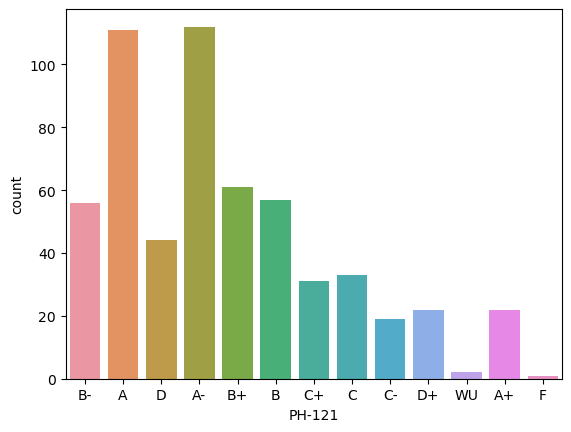

In [258]:
# Univariate Analysis

sns.countplot(x = 'PH-121', data = student_df)
print(student_df['PH-121'].value_counts())

PH-121 

A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: PH-121, dtype: int64


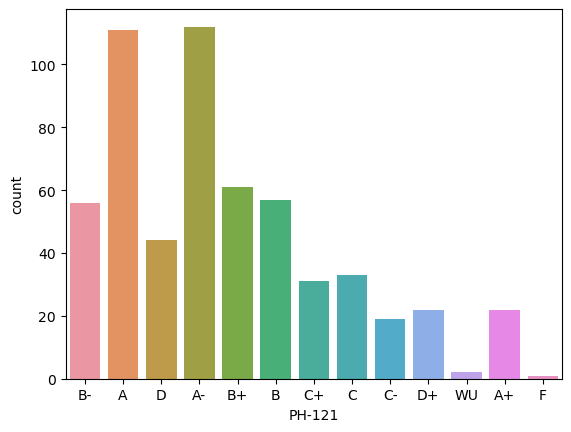

HS-101 

A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: HS-101, dtype: int64


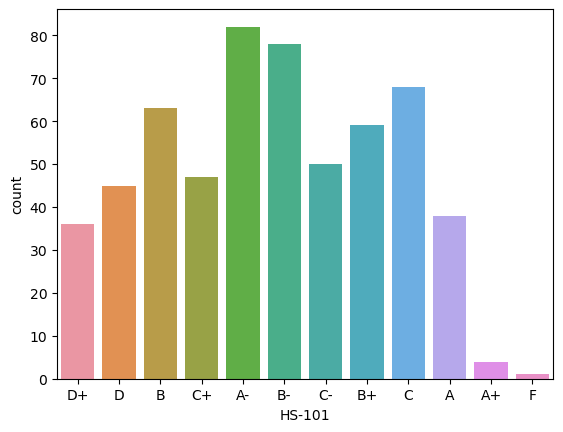

CY-105 

A     178
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: CY-105, dtype: int64


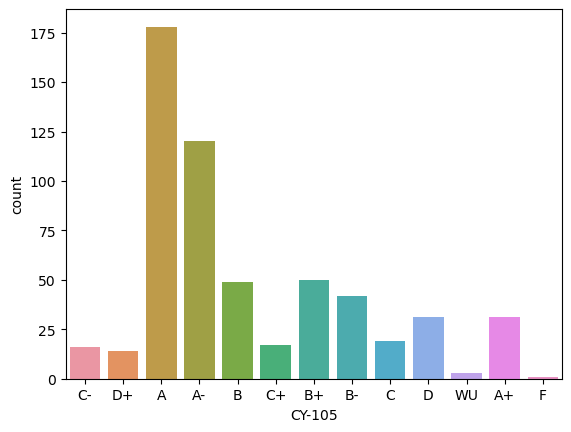

HS-105/12 

A     97
A-    75
B+    70
B     57
D     45
C     41
B-    40
C+    39
C-    36
D+    34
A+    34
WU     2
F      1
Name: HS-105/12, dtype: int64


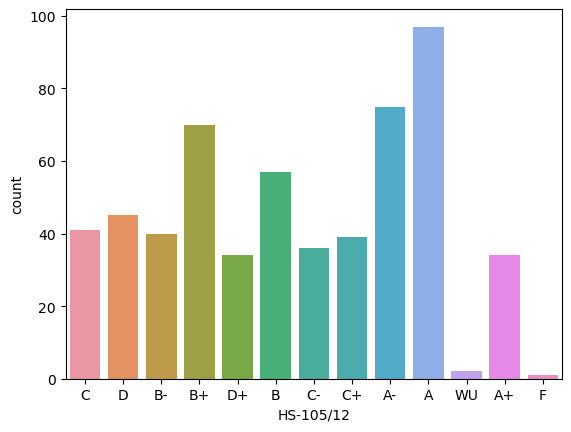

MT-111 

A-    107
A     100
B-     70
B+     62
B      55
C-     39
C+     33
C      30
D      26
A+     23
D+     21
WU      3
F       2
Name: MT-111, dtype: int64


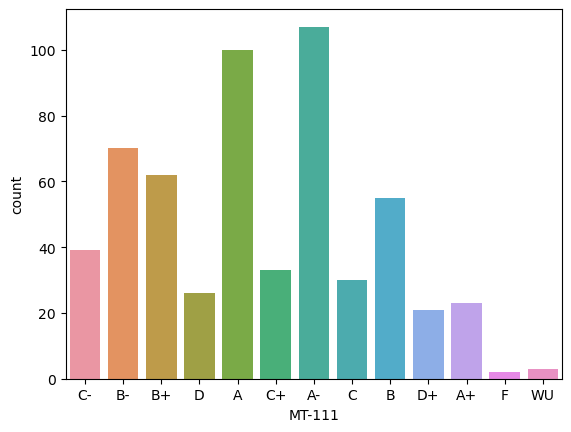

CS-105 

A     151
A-    134
B+     60
B      51
A+     43
B-     38
C+     23
C      22
C-     22
D+     15
D      12
Name: CS-105, dtype: int64


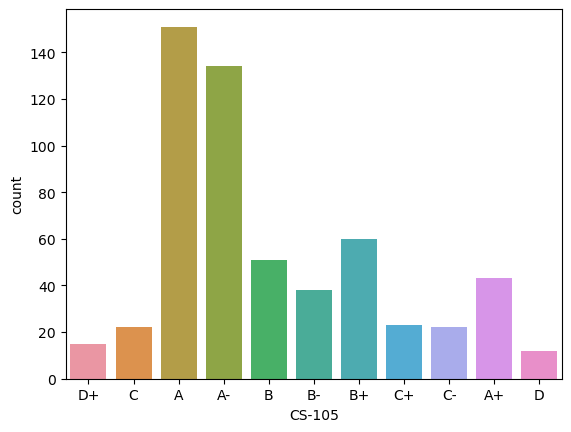

CS-106 

A-    118
B+    101
B      96
A      56
B-     54
C+     41
D+     29
C-     27
D      24
C      18
A+      4
WU      2
F       1
Name: CS-106, dtype: int64


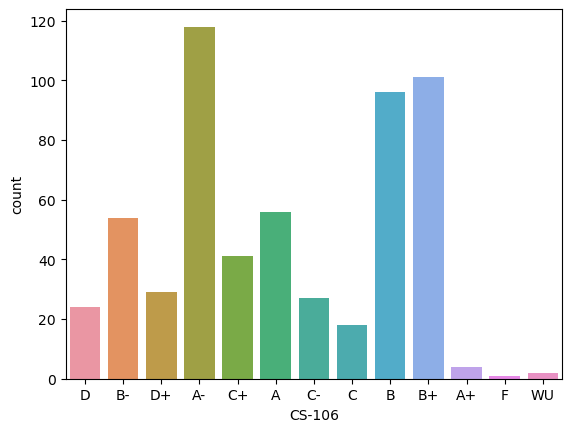

EL-102 

A-    107
A      92
B+     69
B      59
B-     53
D      38
C+     35
C-     32
C      30
A+     29
D+     23
WU      3
F       1
Name: EL-102, dtype: int64


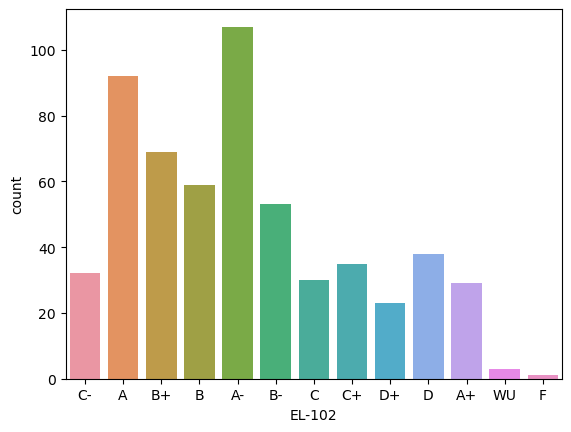

EE-119 

A-    139
B+     83
B      77
A      68
B-     48
C      48
C+     38
D+     26
C-     26
D      11
A+      6
WU      1
Name: EE-119, dtype: int64


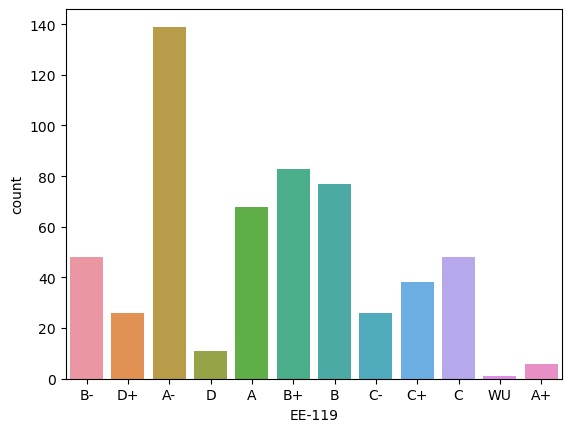

ME-107 

A-    81
A     77
B+    68
D     56
B-    56
B     50
C     49
C-    48
C+    37
D+    37
A+     8
WU     2
F      2
Name: ME-107, dtype: int64


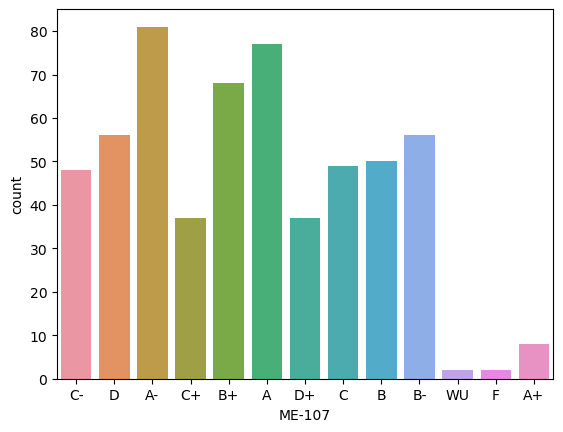

CS-107 

A     107
A-     81
B+     57
B      55
C-     49
B-     43
A+     42
D      38
C+     34
D+     31
C      30
WU      2
I       1
F       1
Name: CS-107, dtype: int64


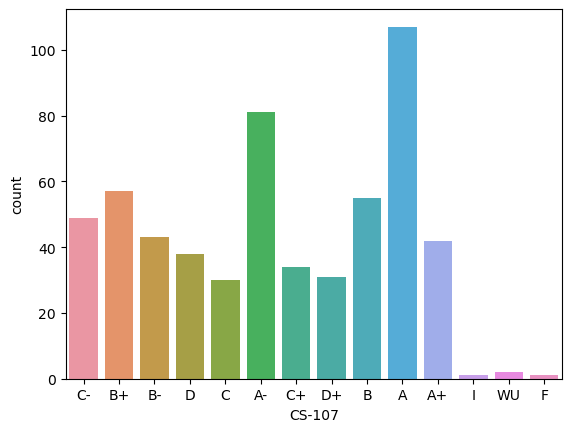

HS-205/20 

A-    155
A     118
B      97
B+     89
B-     36
C+     33
C      15
C-     11
D+      9
D       3
A+      2
F       2
WU      1
Name: HS-205/20, dtype: int64


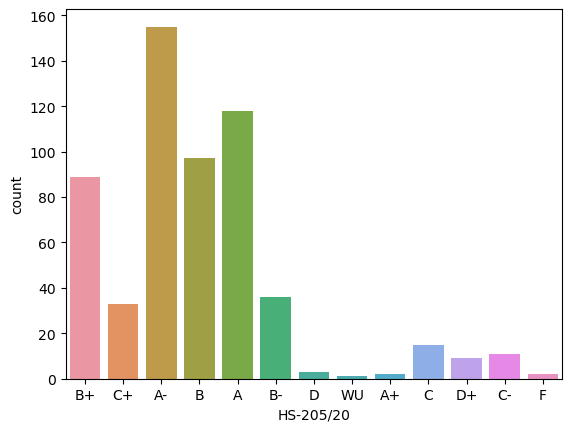

MT-222 

A-    91
A     80
D     66
B     61
B-    52
D+    46
C     43
B+    42
C+    39
C-    30
A+    16
F      3
WU     1
W      1
Name: MT-222, dtype: int64


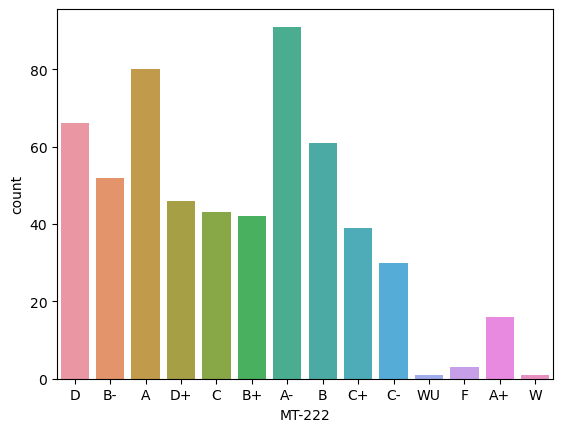

EE-222 

A     129
A-    121
B+     65
B      53
C      39
B-     35
A+     32
C+     29
D      25
D+     21
C-     16
F       4
W       2
Name: EE-222, dtype: int64


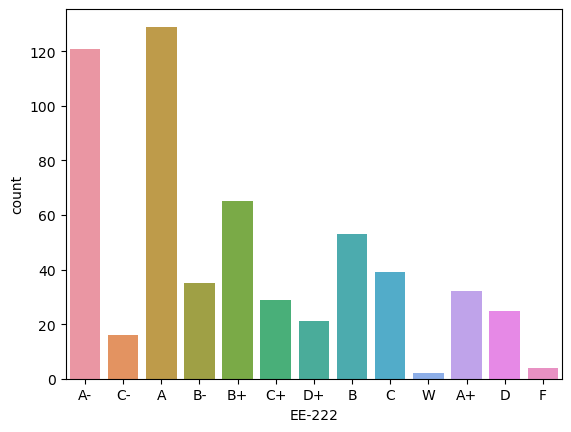

MT-224 

A-    127
A      80
B+     65
B      57
B-     49
C-     43
C+     39
D+     37
D      31
C      30
A+     10
WU      1
W       1
F       1
Name: MT-224, dtype: int64


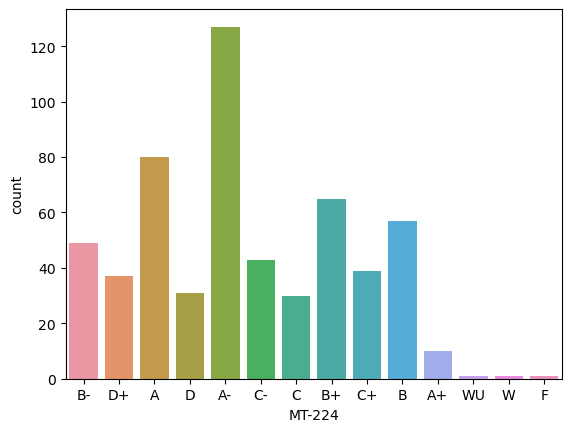

CS-210 

A-    140
A     101
B+     84
B      59
B-     58
C      30
C+     27
C-     24
D+     21
D      12
A+     12
WU      1
W       1
F       1
Name: CS-210, dtype: int64


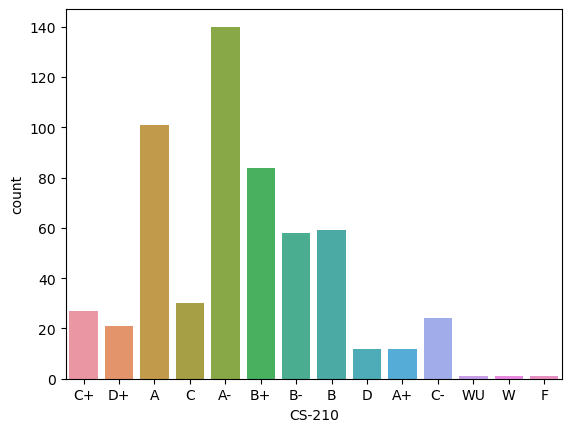

CS-211 

A-    73
A     67
B-    60
D+    56
B+    56
B     56
C+    55
C-    50
C     39
D     33
A+    21
F      3
WU     1
W      1
Name: CS-211, dtype: int64


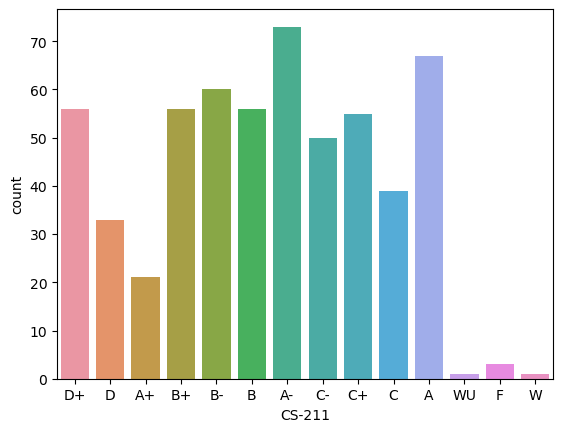

CS-203 

A-    93
A     81
B     66
C+    62
B+    59
B-    53
D+    39
C     35
C-    35
D     30
A+    15
F      2
I      1
Name: CS-203, dtype: int64


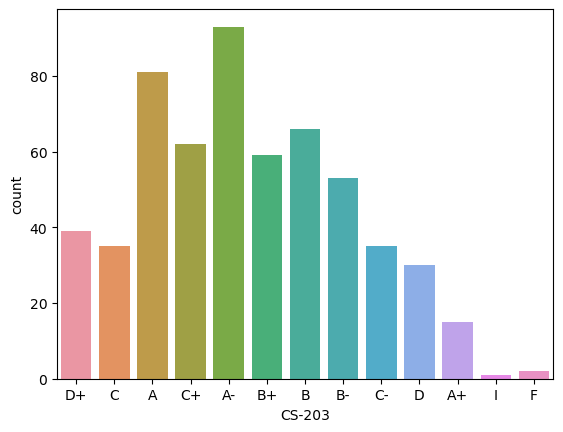

CS-214 

C     82
A-    73
B     63
C-    57
B-    56
A     56
D+    47
C+    46
B+    45
D     31
A+    12
F      2
I      1
Name: CS-214, dtype: int64


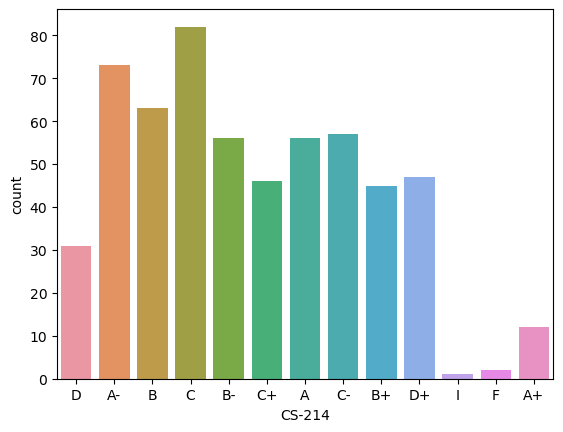

EE-217 

A-    143
A      97
B+     70
B      63
B-     57
C      36
C+     29
A+     22
C-     20
D+     19
D      12
F       2
WU      1
Name: EE-217, dtype: int64


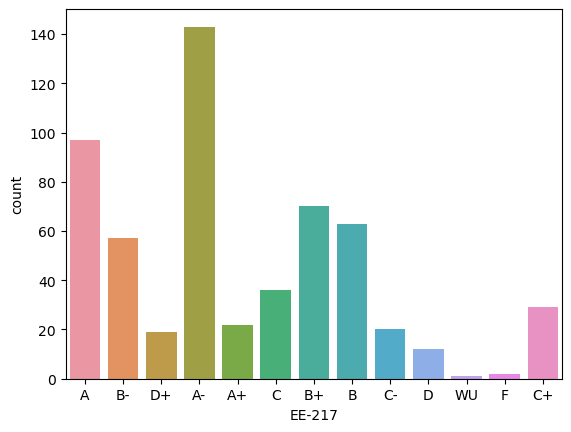

CS-212 

A-    107
B+     86
B      81
B-     65
C      44
A      43
D+     36
C+     35
C-     35
D      33
A+      4
WU      2
Name: CS-212, dtype: int64


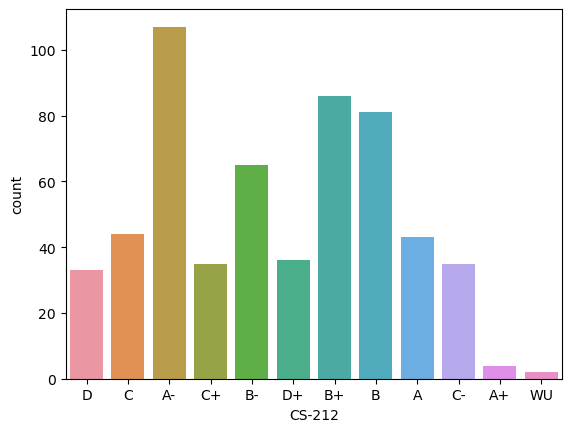

CS-215 

A-    85
A     68
B     64
B-    59
C+    50
B+    50
C     48
C-    47
D     42
D+    38
A+    17
WU     1
W      1
F      1
Name: CS-215, dtype: int64


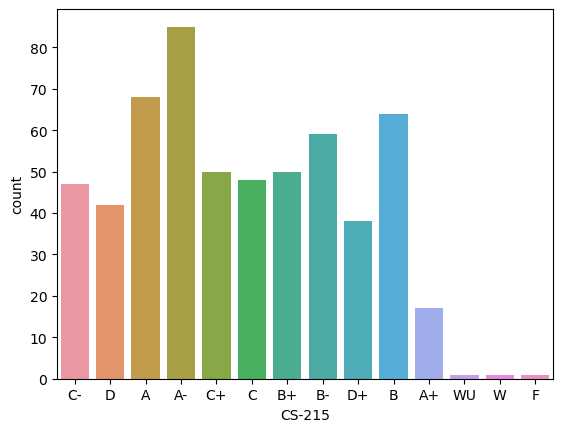

MT-331 

A     127
A-    103
B+     64
B      57
B-     46
C-     32
D+     31
A+     30
C      28
C+     27
D      22
F       4
Name: MT-331, dtype: int64


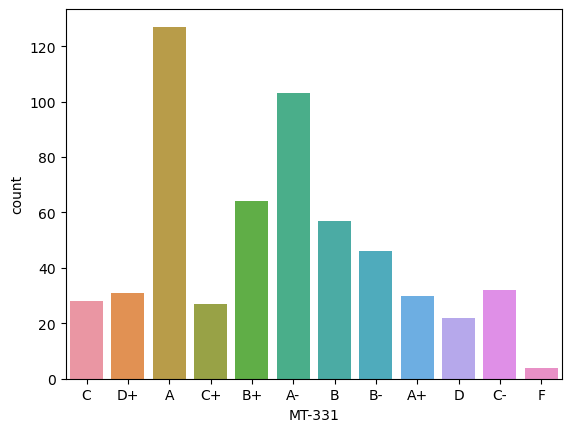

EF-303 

B     122
B-     92
C      61
B+     59
C+     58
C-     56
D+     49
A-     38
D      19
A      14
F       2
WU      1
Name: EF-303, dtype: int64


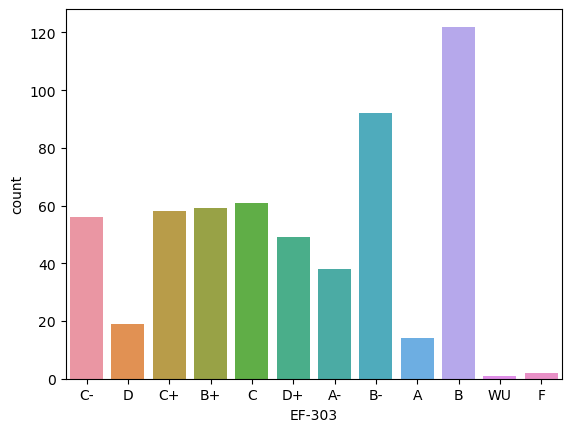

HS-304 

A-    138
B      72
B-     70
B+     66
C      58
C+     53
C-     33
A      28
D      20
D+     19
F       6
A+      4
WU      2
W       2
Name: HS-304, dtype: int64


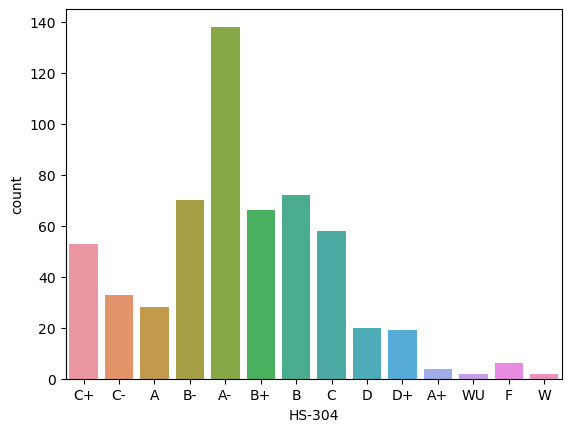

CS-301 

A-    118
B+     74
B      71
A      66
B-     60
C      41
C+     37
C-     36
D      29
D+     29
A+      9
F       1
Name: CS-301, dtype: int64


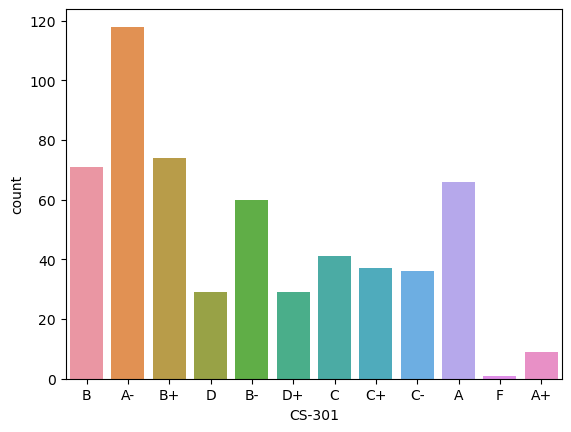

CS-302 

A-    123
B     102
A      86
B+     81
B-     60
C+     32
C      28
D      21
C-     19
D+     10
A+      9
Name: CS-302, dtype: int64


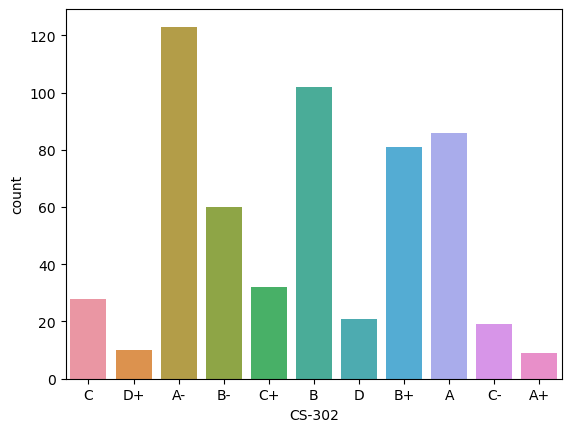

TC-383 

A     115
A-     73
B+     68
B      59
C+     44
D+     44
C-     42
C      42
B-     40
A+     23
D      20
F       1
Name: TC-383, dtype: int64


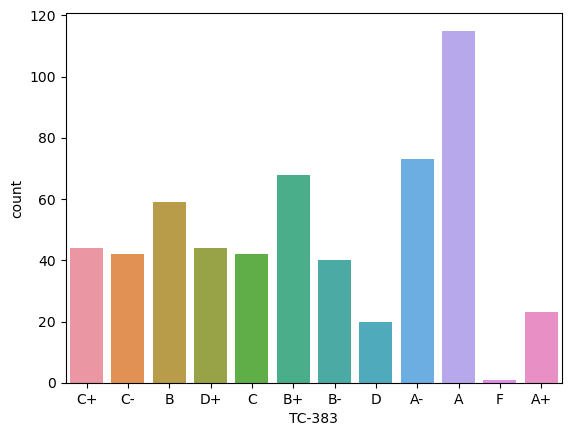

MT-442 

A-    150
A     130
B+     65
B      47
A+     39
B-     30
C-     28
C+     24
C      24
D      20
D+     13
F       1
Name: MT-442, dtype: int64


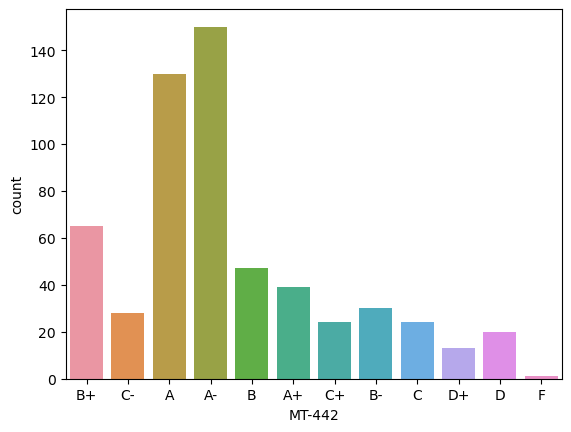

EL-332 

A-    105
A      76
B+     68
B      67
B-     62
C      49
C+     38
C-     32
D+     22
D      22
A+     20
F       9
WU      1
Name: EL-332, dtype: int64


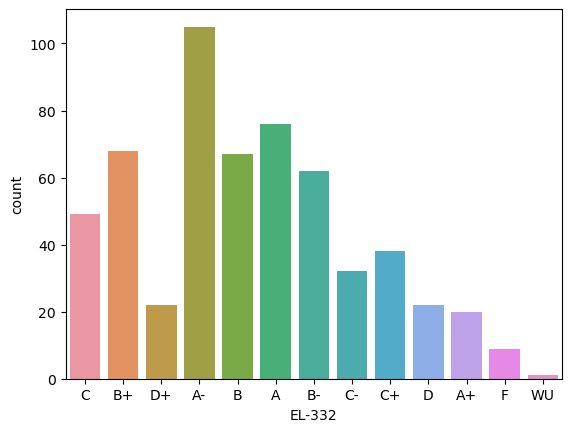

CS-318 

A-    98
B-    69
B     68
B+    65
C     53
C+    49
A     42
C-    40
D     36
D+    29
F     10
A+     6
WU     5
W      1
Name: CS-318, dtype: int64


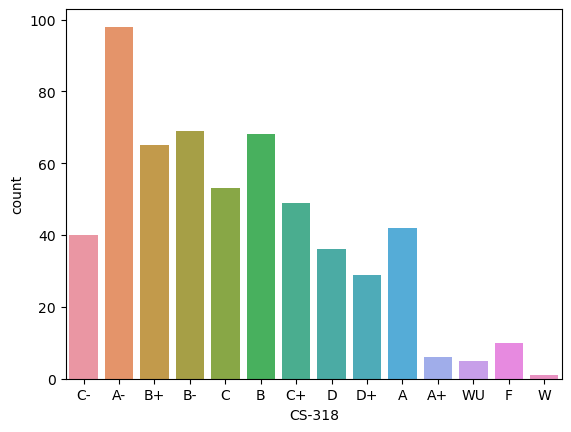

CS-306 

A-    129
B+     75
A      74
B-     64
B      53
C-     40
C      37
C+     36
D      31
D+     18
A+     10
F       3
WU      1
Name: CS-306, dtype: int64


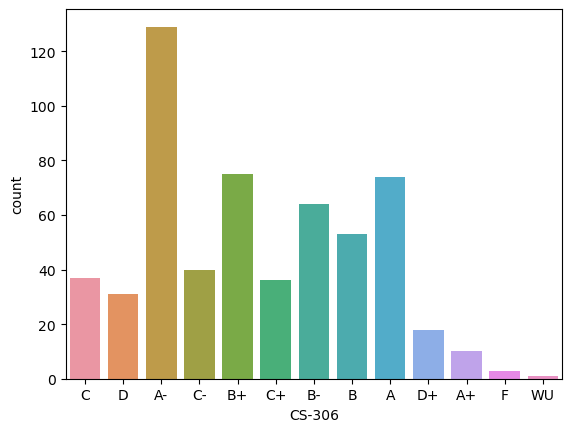

CS-312 

A+    103
A      86
A-     63
D+     52
C      48
C-     44
B+     42
B      37
C+     37
B-     36
D      19
F       2
W       1
WU      1
Name: CS-312, dtype: int64


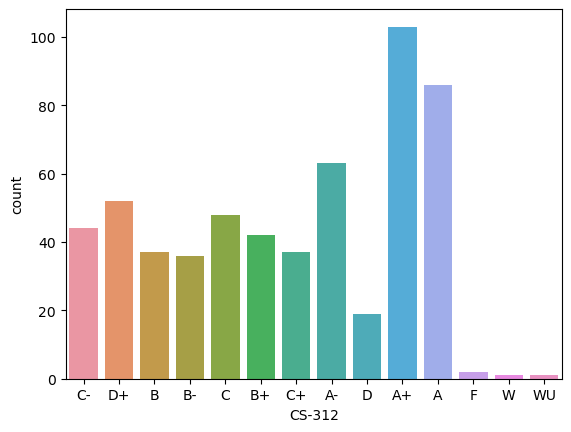

CS-317 

B-    91
B     75
C     70
A-    66
B+    58
C+    57
A     47
C-    41
D+    34
D     16
A+     9
F      7
Name: CS-317, dtype: int64


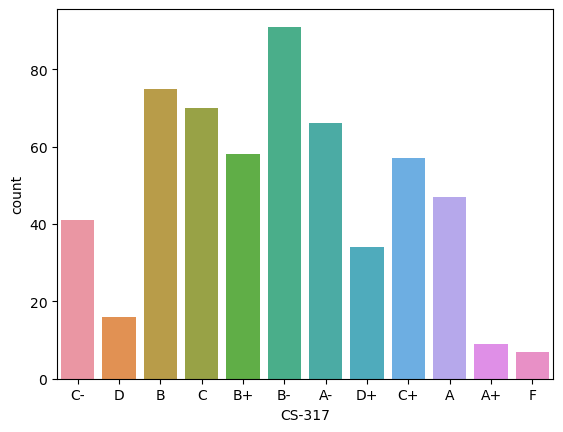

CS-403 

A     145
A-    106
B+     62
B-     55
B      54
D+     35
C      33
C+     32
C-     30
A+     15
D       4
Name: CS-403, dtype: int64


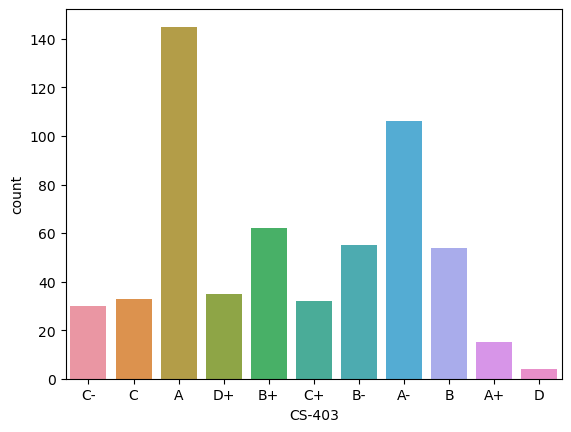

CS-421 

B     98
B-    74
C     68
C+    61
C-    60
B+    60
A-    47
D+    36
A     25
D     21
F     17
A+     2
W      2
Name: CS-421, dtype: int64


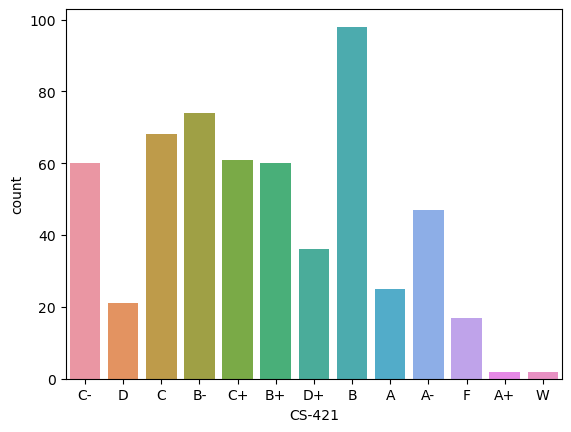

CS-406 

A-    262
A      79
B+     64
B      58
B-     22
C+     22
C      19
D+     14
C-      8
A+      8
F       6
D       5
W       3
WU      1
Name: CS-406, dtype: int64


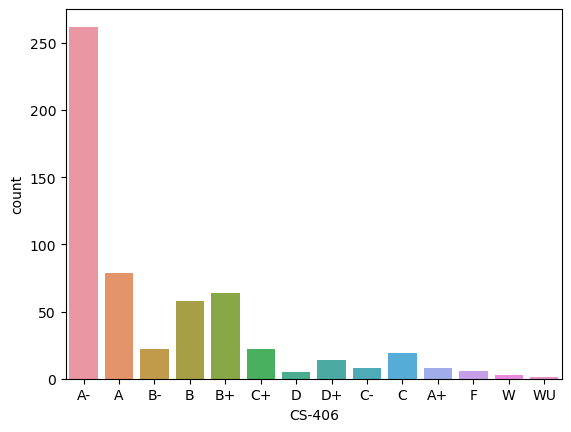

CS-414 

A     189
A-    156
B+     62
B      54
B-     21
A+     21
C+     21
C      20
C-     12
F       7
D+      3
D       3
W       2
Name: CS-414, dtype: int64


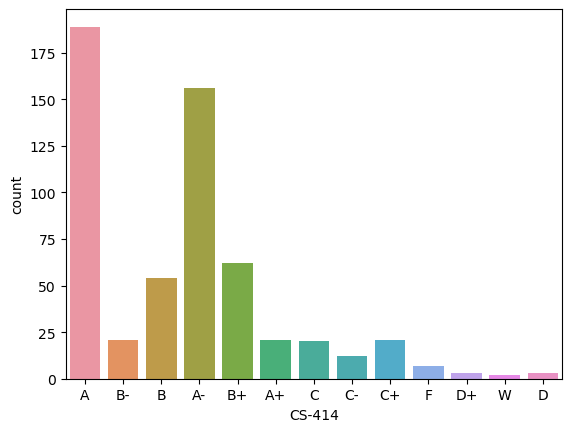

CS-419 

A-    133
B      89
B+     85
B-     78
A      56
C+     46
C      40
C-     20
D+     13
D       7
A+      2
F       2
Name: CS-419, dtype: int64


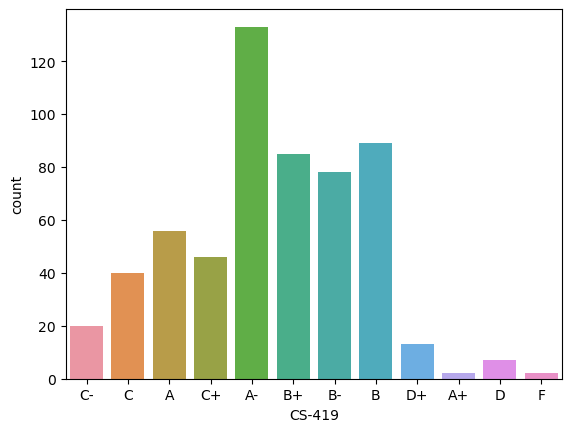

CS-423 

A-    136
A      78
B+     75
B      65
B-     56
C      45
C+     39
C-     29
D+     25
D      15
F       5
A+      3
Name: CS-423, dtype: int64


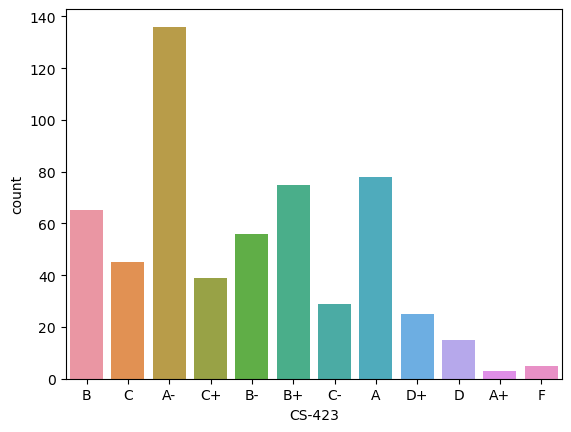

CS-412 

A-    236
B+     80
A      77
B      65
B-     37
C+     24
C      19
D+      8
C-      7
F       6
D       5
A+      4
W       3
Name: CS-412, dtype: int64


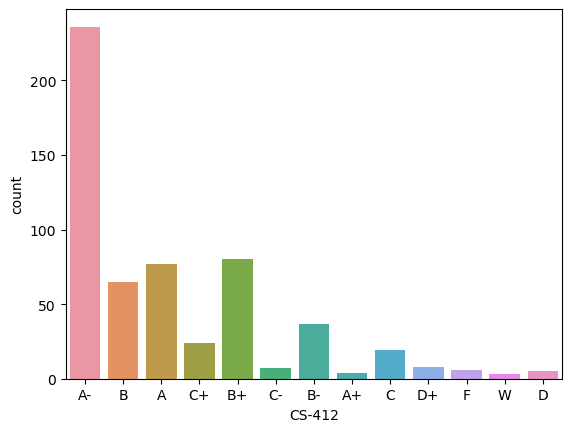

CGPA 

3.019    5
3.058    3
2.793    3
3.443    3
2.206    3
        ..
2.555    1
2.042    1
2.634    1
2.053    1
1.753    1
Name: CGPA, Length: 491, dtype: int64


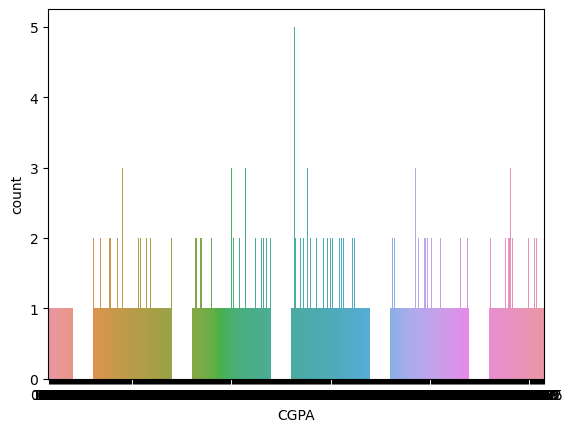

In [259]:
# Univariate Analysis
for i in student_df.columns:
    print(i, '\n')
    sns.countplot(student_df[i])
    print(student_df[i].value_counts())
    plt.show()

Observation:
            1. Highest grade and its count in each subject
                    Subject    Grade   Count
                     PH-121      A-    112
                     HS-101      A-    82
                     CY-105      A     178
                     HS-105/12   A     97
                     MT-111      A-    107
                     CS-105      A     151
                     CS-106      A-    118
                     EL-102      A-    107
                     EE-119      A-    139
                     ME-107      A-    81
                     CS-107      A     107
                     HS-205/20   A-    155
                     MT-222      A-    91
                     EE-222      A     129
                     MT-224      A-    127
                     CS-210      A-    140
                     CS-211      A-    73
                     CS-203      A-    93
                     CS-214      C     82
                     EE-217      A-    143
                     CS-212      A-    107
                     CS-215      A-    85
                     MT-331      A     127
                     EF-303      B     122
                     HS-304      A-    138
                     CS-301      A-    118
                     CS-302      A-    123
                     TC-383      A     115
                     MT-442      A-    150
                     EL-332      A-    105
                     CS-318      A-    98
                     CS-306      A-    129
                     CS-312      A+    103
                     CS-317      B-    91
                     CS-403      A     145
                     CS-421      B     98
                     CS-406      A-    262
                     CS-414      A     189
                     CS-419      A-    133
                     CS-423      A-    136
                     CS-412      A-    236
                     CGPA        3.019    5

<AxesSubplot:xlabel='CGPA', ylabel='Count'>

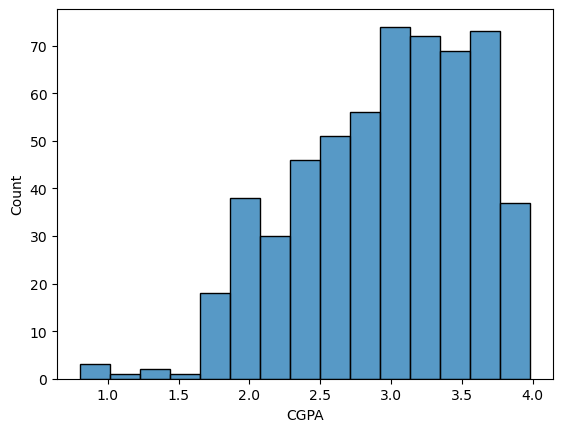

In [260]:
sns.histplot(student_df.CGPA)

## Feature Encoding

In [261]:
# Convert Object data type to int type

student_df.dtypes

PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

In [262]:
from sklearn.preprocessing import LabelEncoder

label_enc =  LabelEncoder()

In [263]:
for i in student_df.drop('CGPA', axis = 1):
    student_df[i] = label_enc.fit_transform(student_df[i])

In [264]:
student_df.dtypes

PH-121         int32
HS-101         int32
CY-105         int32
HS-105/12      int32
MT-111         int32
CS-105         int32
CS-106         int32
EL-102         int32
EE-119         int32
ME-107         int32
CS-107         int32
HS-205/20      int32
MT-222         int32
EE-222         int32
MT-224         int32
CS-210         int32
CS-211         int32
CS-203         int32
CS-214         int32
EE-217         int32
CS-212         int32
CS-215         int32
MT-331         int32
EF-303         int32
HS-304         int32
CS-301         int32
CS-302         int32
TC-383         int32
MT-442         int32
EL-332         int32
CS-318         int32
CS-306         int32
CS-312         int32
CS-317         int32
CS-403         int32
CS-421         int32
CS-406         int32
CS-414         int32
CS-419         int32
CS-423         int32
CS-412         int32
CGPA         float64
dtype: object

In [ ]:
Observation:
            1. All features object type is converted into int type

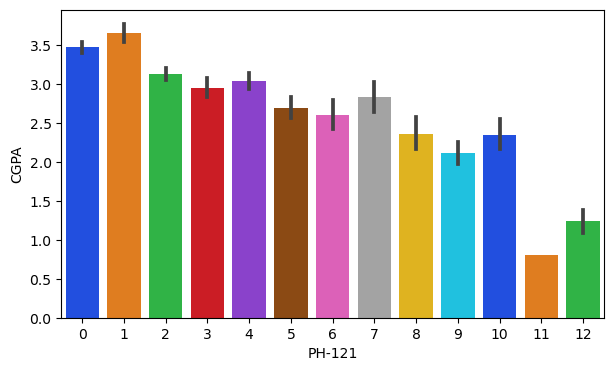

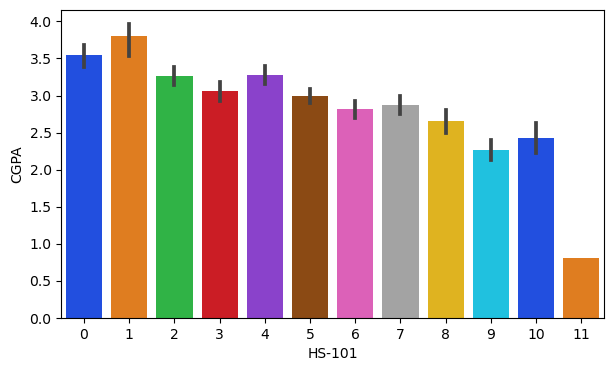

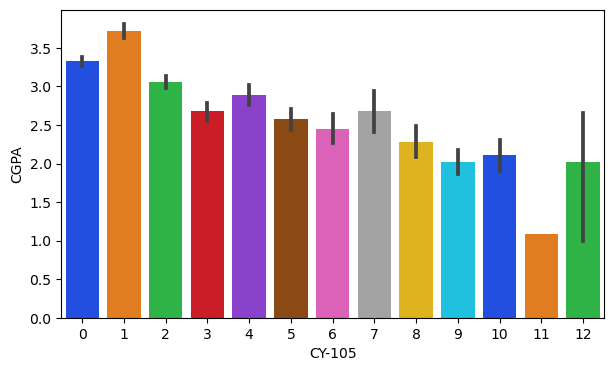

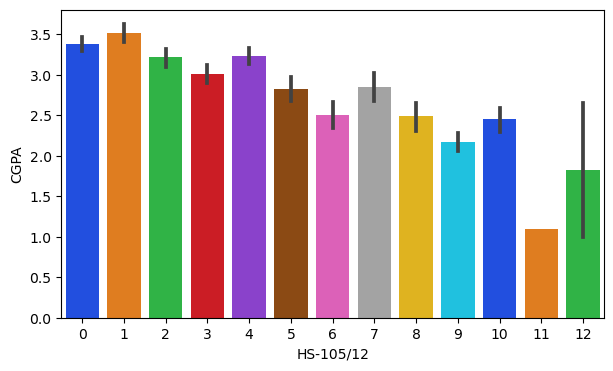

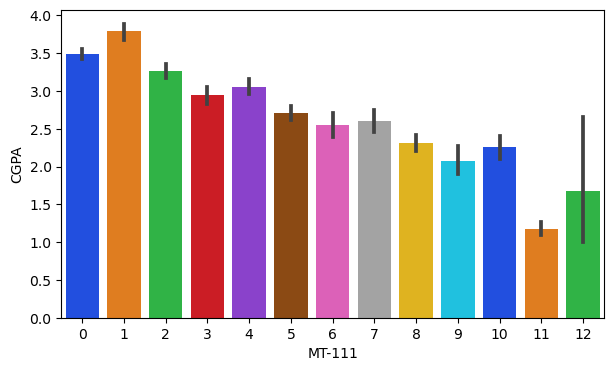

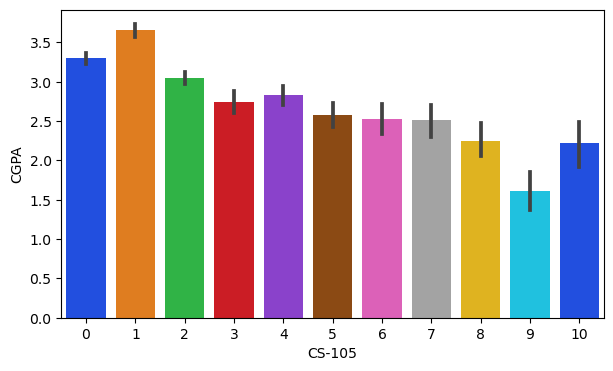

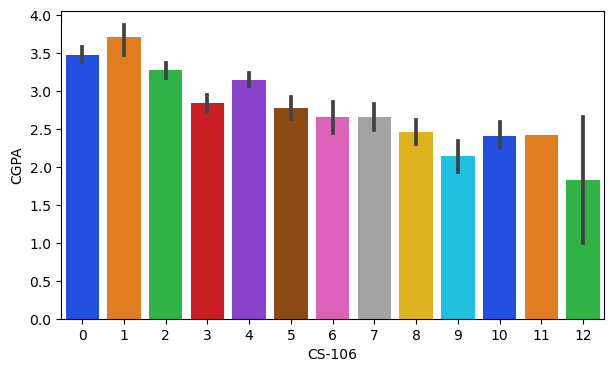

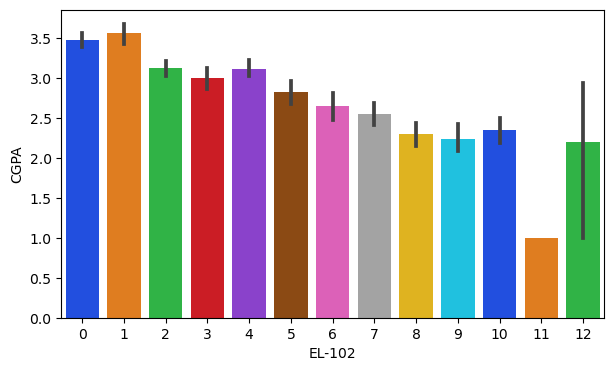

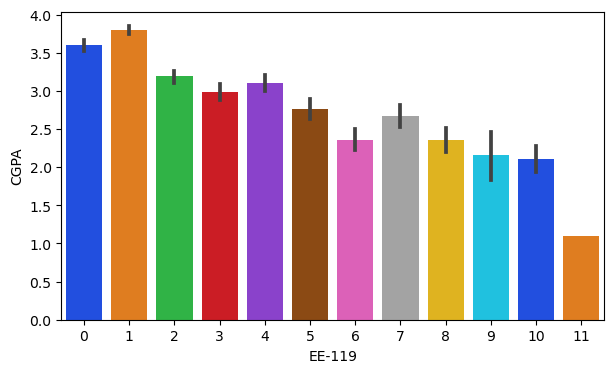

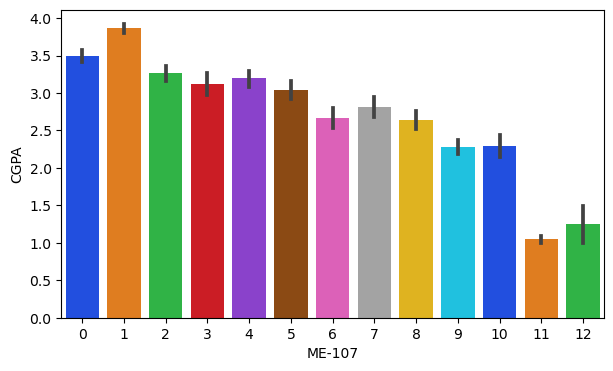

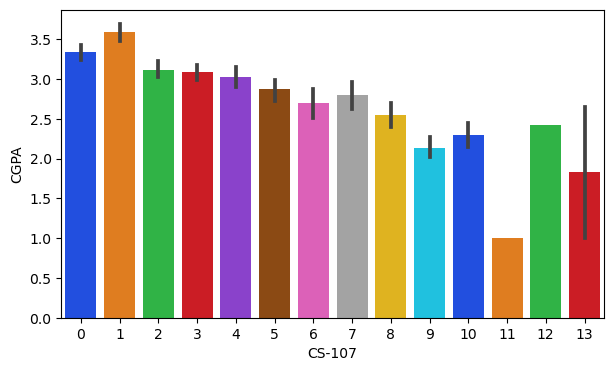

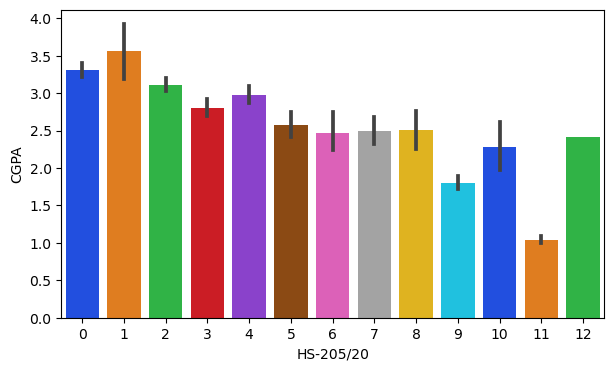

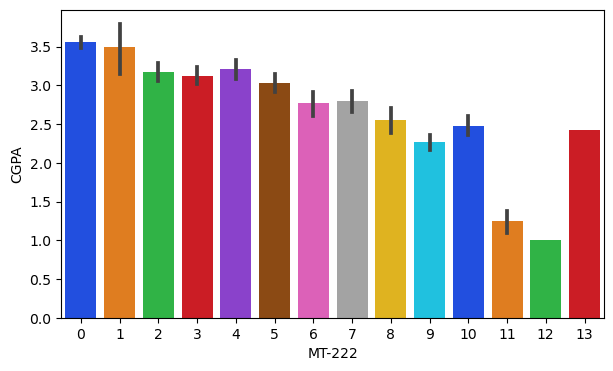

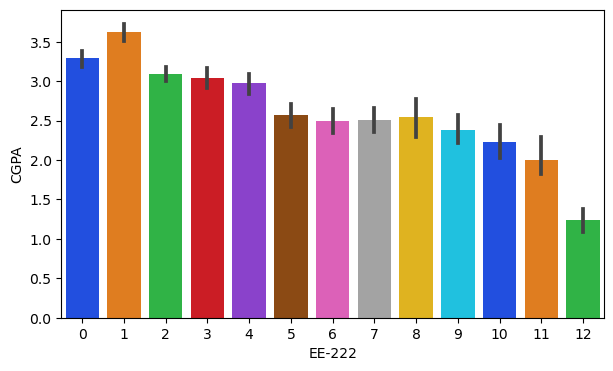

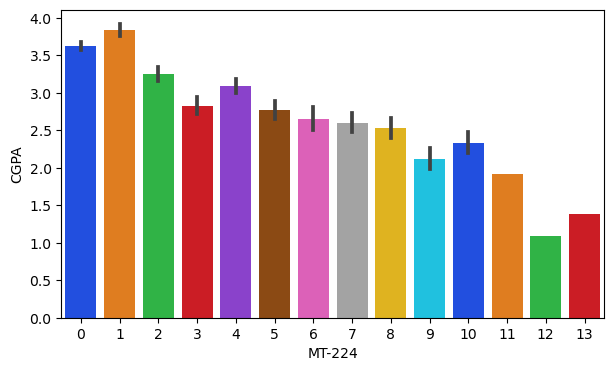

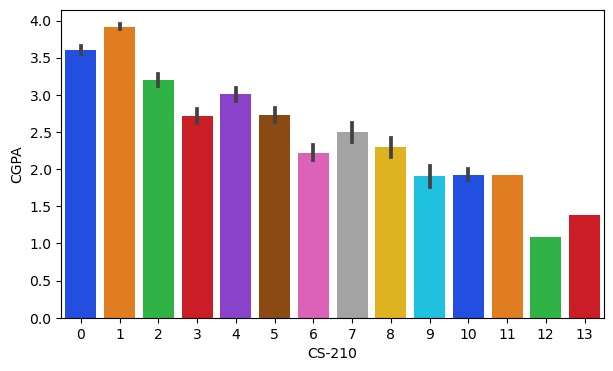

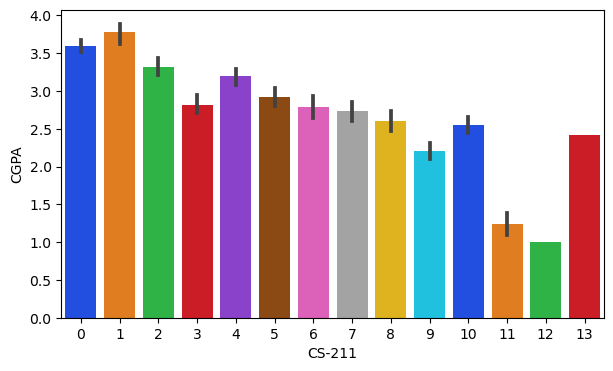

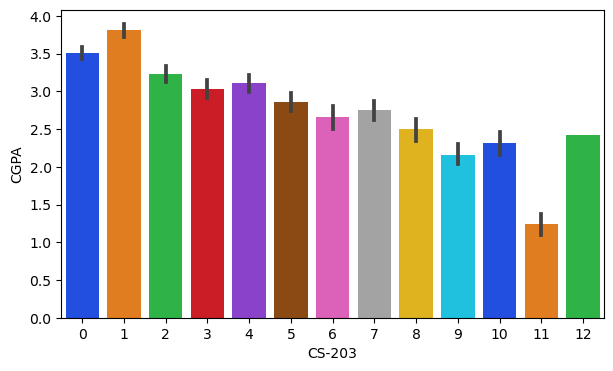

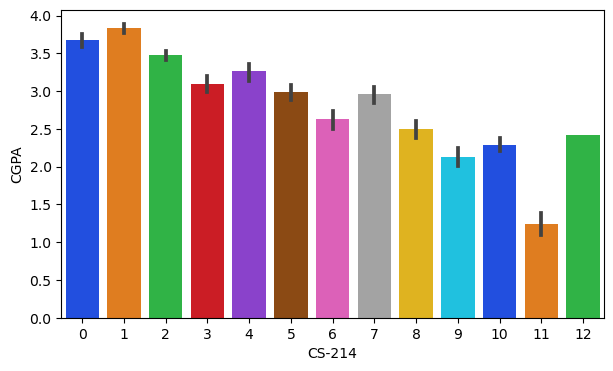

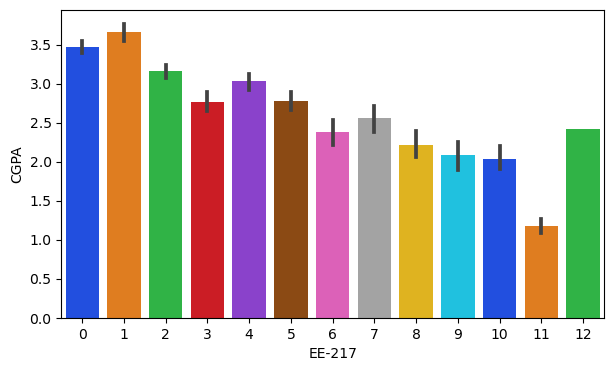

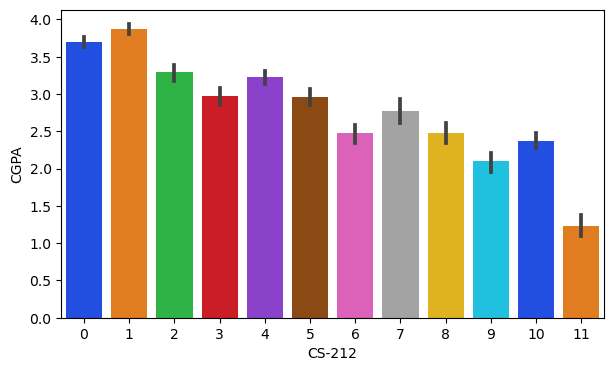

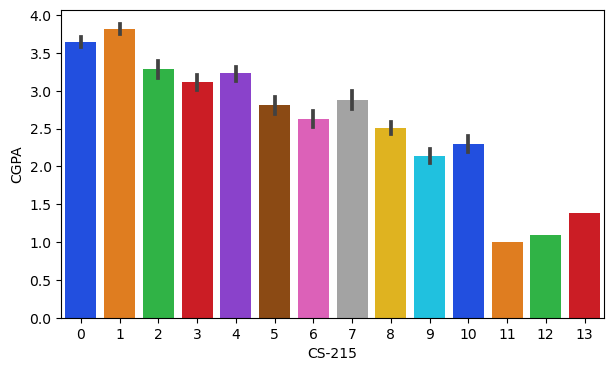

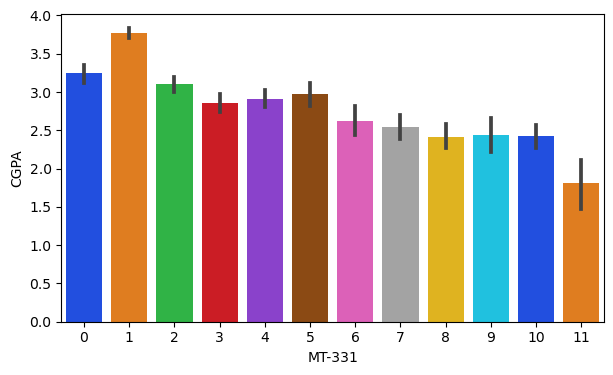

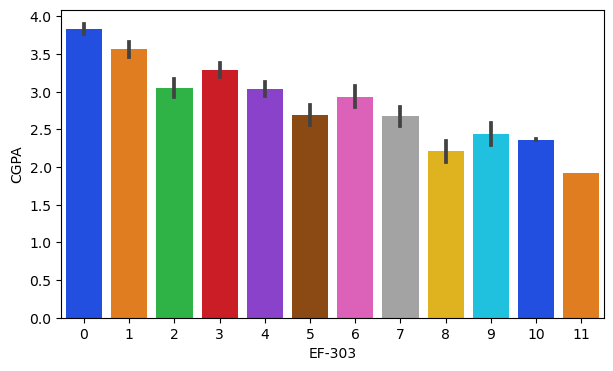

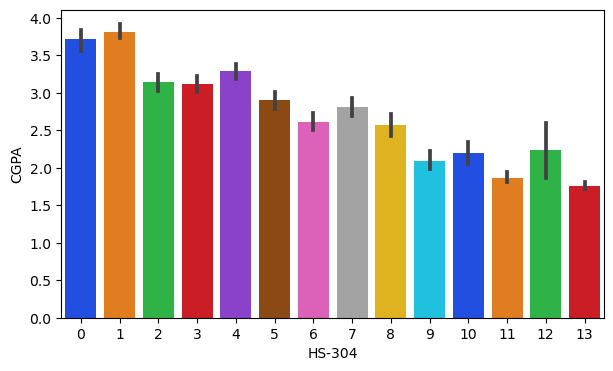

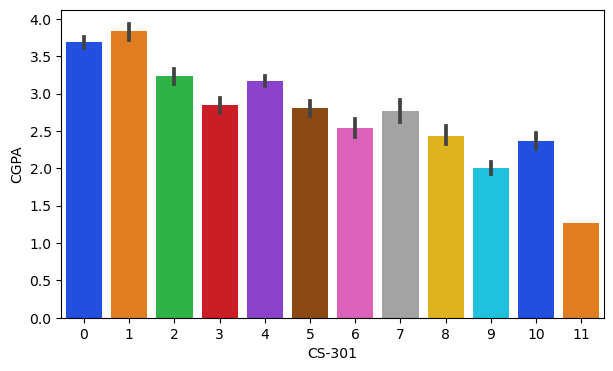

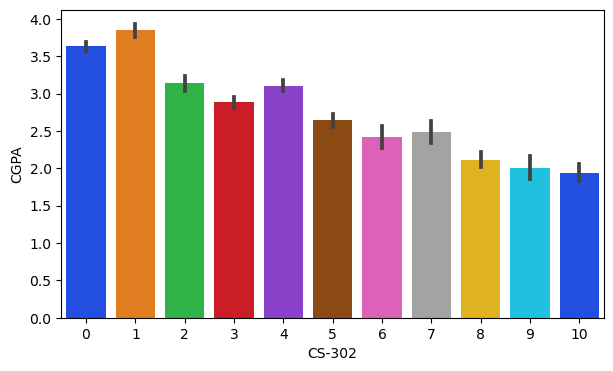

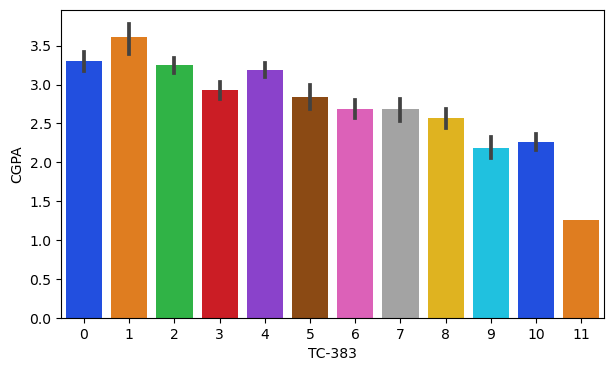

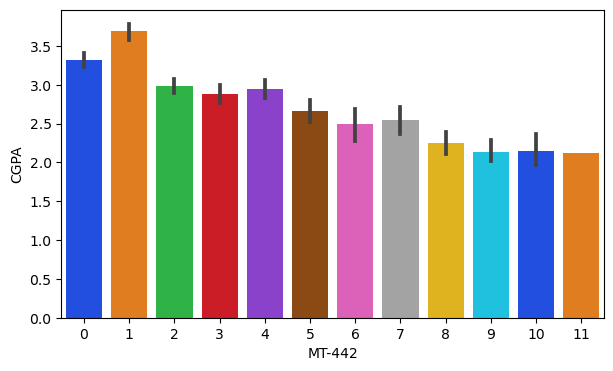

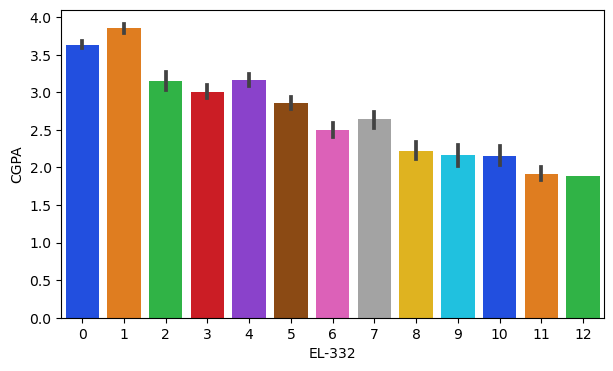

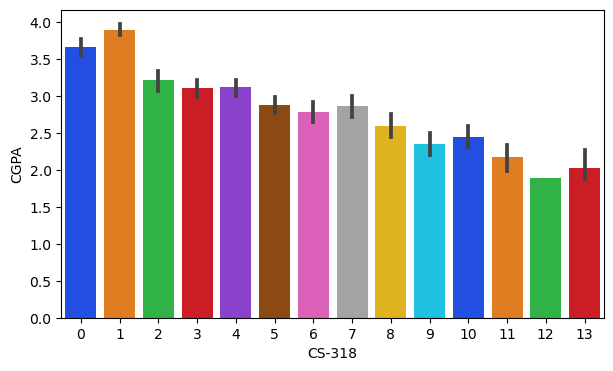

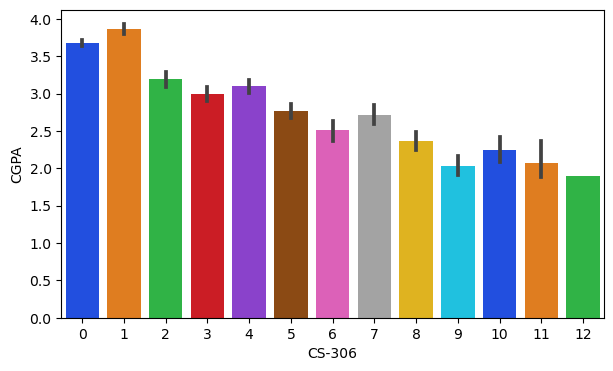

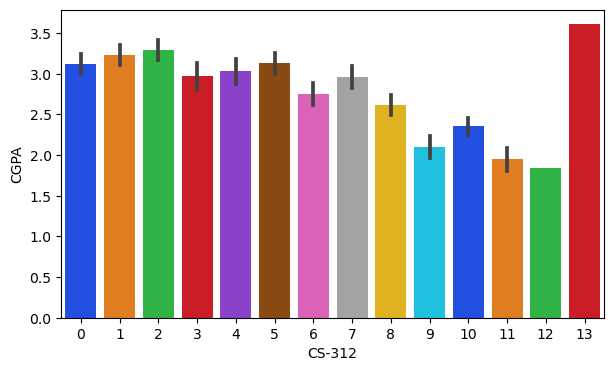

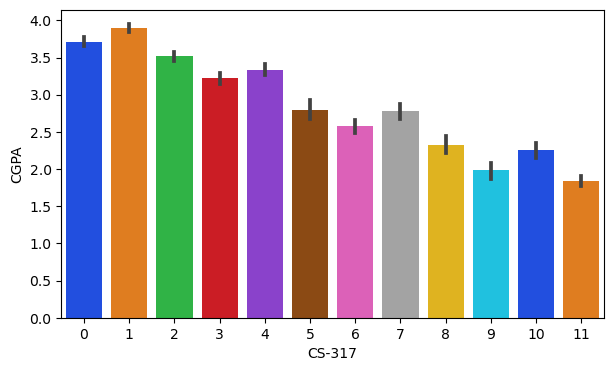

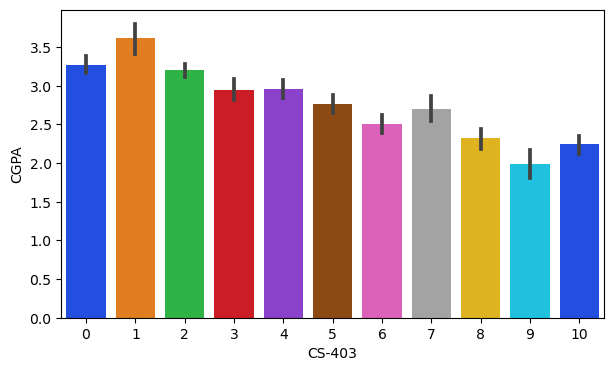

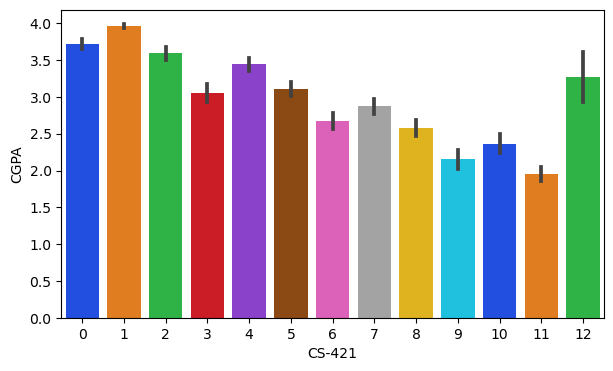

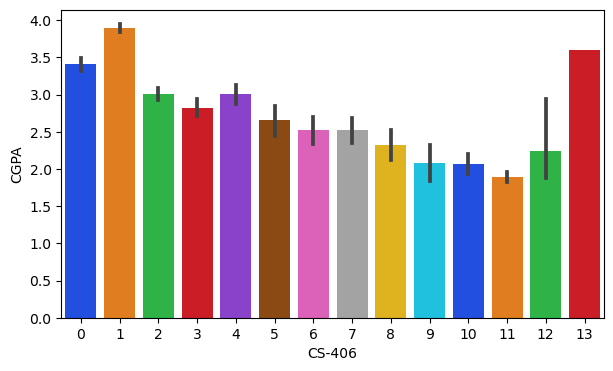

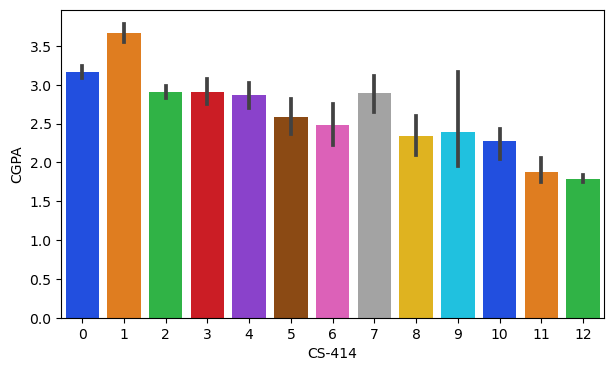

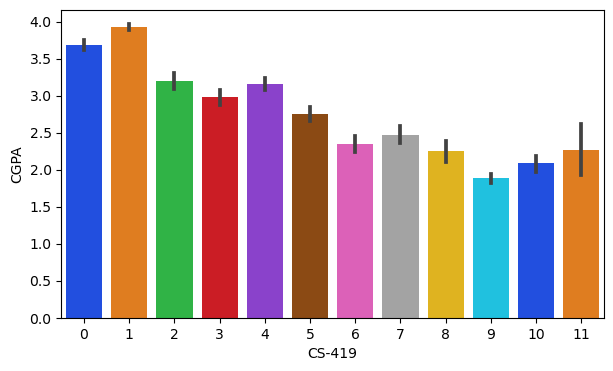

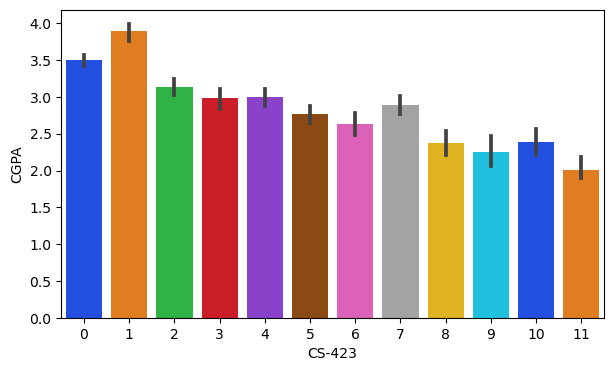

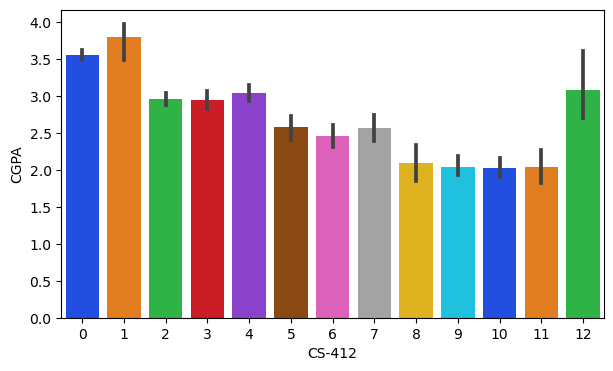

In [265]:
for i in student_df.drop(['CGPA'], axis = 1):
    plt.figure(figsize = (7, 4))
    sns.barplot(x = i, y = 'CGPA', data = student_df, palette = 'bright')
    plt.show()

In [266]:
student_df.shape

(571, 42)

In [267]:
student_df.head(3)

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,5,10,8,6,8,10,9,8,5,8,...,8,8,8,8,2,0,8,3,2,2.205
1,0,9,10,9,5,6,9,0,10,9,...,10,9,6,9,2,5,6,6,3,2.008
2,0,3,0,5,4,0,5,4,2,2,...,3,3,0,6,0,0,0,2,0,3.608


In [268]:
student_df.describe()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,3.781086,5.071804,2.898424,4.241681,3.896673,2.838879,4.122592,3.959720,3.886165,4.779335,...,4.071804,4.835377,3.432574,5.385289,2.984238,2.397548,3.856392,3.966725,3.049037,2.954888
std,3.046895,2.785317,2.964737,3.200507,2.988546,2.696709,2.727192,3.031436,2.657528,3.146202,...,3.362345,2.740382,2.980685,2.729063,2.468346,2.499388,2.382769,2.795475,2.332316,0.620552
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000
25%,2.000000,3.000000,0.000000,2.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,3.000000,0.000000,3.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.538000
50%,3.000000,5.000000,2.000000,4.000000,4.000000,2.000000,4.000000,3.000000,3.000000,5.000000,...,3.000000,5.000000,3.000000,5.000000,2.000000,2.000000,4.000000,4.000000,2.000000,3.029000
75%,6.000000,7.000000,4.500000,7.000000,6.000000,4.000000,5.000000,6.000000,6.000000,8.000000,...,7.000000,7.000000,5.000000,7.000000,4.000000,4.000000,5.000000,6.000000,4.000000,3.451000
max,12.000000,11.000000,12.000000,12.000000,12.000000,10.000000,12.000000,12.000000,11.000000,12.000000,...,13.000000,11.000000,10.000000,12.000000,13.000000,12.000000,11.000000,11.000000,12.000000,3.985000


## Check for Multicollinearity

In [269]:
# get coefficient of one variable with all the other variables

cor = student_df.corr()
cor

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
PH-121,1.000000,0.382436,0.557843,0.498561,0.468968,0.609990,0.293963,0.423942,0.579964,0.533558,...,0.038184,0.464022,0.321264,0.290351,0.280166,0.152437,0.462770,0.094921,0.293815,-0.663135
HS-101,0.382436,1.000000,0.335074,0.473132,0.432742,0.400713,0.312019,0.349412,0.309697,0.336545,...,0.213380,0.364250,0.229546,0.301934,0.265551,0.225977,0.284668,0.228103,0.226039,-0.537170
CY-105,0.557843,0.335074,1.000000,0.510123,0.538380,0.578573,0.378223,0.447539,0.467250,0.464418,...,0.261555,0.472137,0.464575,0.349827,0.129957,0.008774,0.430053,0.120885,0.064912,-0.658282
HS-105/12,0.498561,0.473132,0.510123,1.000000,0.494731,0.482406,0.499093,0.360304,0.400303,0.320137,...,0.263143,0.478816,0.451907,0.415946,0.168150,0.142806,0.465352,0.235029,0.153293,-0.613989
MT-111,0.468968,0.432742,0.538380,0.494731,1.000000,0.393684,0.500729,0.555895,0.409161,0.471685,...,0.467946,0.555098,0.410540,0.511463,0.300391,0.228637,0.502473,0.400679,0.269792,-0.730095
CS-105,0.609990,0.400713,0.578573,0.482406,0.393684,1.000000,0.286324,0.353949,0.507357,0.455470,...,0.059711,0.387639,0.279329,0.236345,0.237615,0.121965,0.306827,0.045134,0.179777,-0.613169
CS-106,0.293963,0.312019,0.378223,0.499093,0.500729,0.286324,1.000000,0.338645,0.269895,0.281233,...,0.450752,0.416562,0.426402,0.397195,0.129554,0.108916,0.421989,0.339963,0.185782,-0.534995
EL-102,0.423942,0.349412,0.447539,0.360304,0.555895,0.353949,0.338645,1.000000,0.448908,0.461690,...,0.301324,0.466556,0.304240,0.368959,0.253133,0.242234,0.379308,0.369173,0.265289,-0.642262
EE-119,0.579964,0.309697,0.467250,0.400303,0.409161,0.507357,0.269895,0.448908,1.000000,0.572964,...,0.156809,0.445496,0.341988,0.359230,0.297664,0.214165,0.465913,0.244615,0.320746,-0.646829
ME-107,0.533558,0.336545,0.464418,0.320137,0.471685,0.455470,0.281233,0.461690,0.572964,1.000000,...,0.199848,0.462568,0.336647,0.345832,0.300913,0.154184,0.440407,0.220977,0.293638,-0.663023


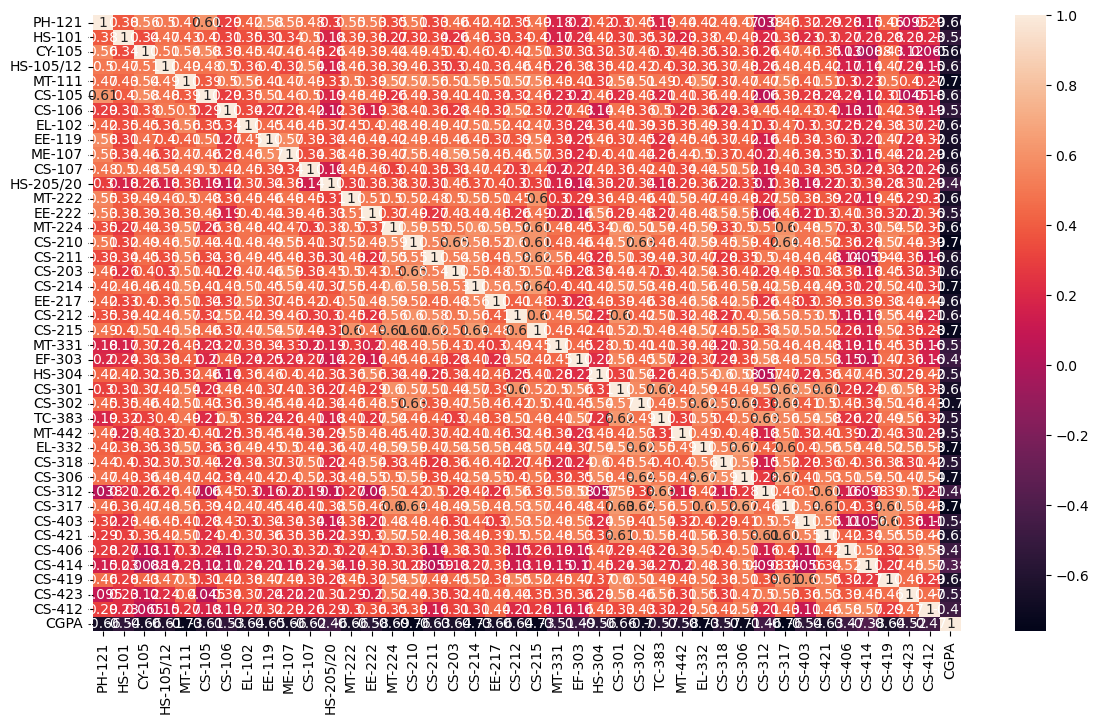

In [270]:
# visualize correlation using heatmap

plt.figure(figsize = (14, 8))
sns.heatmap(cor, annot = True, annot_kws = {'size' : 10})
plt.show()

Observation:
            1. All features are needed as we need to calculate CGPA 
            2. Calculation of CGPA depends upon all the subjects

## Seperating Features and Target

In [271]:
x = student_df.drop(columns = ['CGPA'])
y = student_df['CGPA']

In [272]:
x

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,5,10,8,6,8,10,9,8,5,8,...,6,8,8,8,8,2,0,8,3,2
1,0,9,10,9,5,6,9,0,10,9,...,9,10,9,6,9,2,5,6,6,3
2,0,3,0,5,4,0,5,4,2,2,...,2,3,3,0,6,0,0,0,2,0
3,9,7,10,9,9,2,10,8,9,7,...,8,10,6,10,8,5,3,7,7,7
4,2,2,2,4,0,0,2,4,0,2,...,2,5,4,4,5,2,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3,0,0,2,1,0,2,2,1,4,...,4,2,2,0,0,0,4,4,3,0
567,1,0,0,0,0,0,0,2,0,0,...,2,4,4,0,0,2,3,2,6,2
568,3,0,2,4,0,0,0,0,0,3,...,4,2,3,0,4,0,6,4,2,2
569,0,4,9,0,9,10,5,8,5,8,...,4,9,3,3,8,9,6,3,5,6


In [273]:
y

0      2.205
1      2.008
2      3.608
3      1.906
4      3.448
       ...  
566    3.798
567    3.772
568    3.470
569    2.193
570    1.753
Name: CGPA, Length: 571, dtype: float64

## Checking Outliers

## No need to check outliers as all the feature data are categorical

## Checking for Skewness

## No need to check skewness as all the feature data are categorical

## Data Standardization 

In [274]:
s = StandardScaler()
x1 = s.fit_transform(x)
x1

array([[ 0.40040198,  1.77089951,  1.72226058, ...,  1.74051347,
        -0.34612103, -0.45017773],
       [-1.24205154,  1.4115592 ,  2.39744822, ...,  0.90041779,
         0.72798282, -0.02104337],
       [-1.24205154, -0.74448263, -0.97848996, ..., -1.61986925,
        -0.70415565, -1.30844646],
       ...,
       [-0.25657943, -1.82250355, -0.30330233, ...,  0.06032211,
        -0.70415565, -0.45017773],
       [-1.24205154, -0.38514232,  2.0598544 , ..., -0.35972573,
         0.3699482 ,  1.26635973],
       [ 0.72889268,  1.4115592 ,  2.0598544 , ...,  0.06032211,
         1.80208667,  2.12462846]])

In [275]:
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size = 0.25, random_state = 348)

In [276]:
y_train.head()

506    3.107
22     2.953
201    3.019
289    3.943
332    2.716
Name: CGPA, dtype: float64

## Modelling

In [277]:
student_df.shape

(571, 42)

In [278]:
student_df.columns

Index(['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412', 'CGPA'],
      dtype='object')

In [279]:
x.shape

(571, 41)

In [280]:
y.shape

(571,)

## Linear Regression 

In [281]:
model_LR = LinearRegression()

In [282]:
model_LR.fit(x_train , y_train)

LinearRegression()

## Lets check how well model fits on train data

In [283]:
model_LR.score(x_train, y_train)

0.9787011280214872

## Lets check how well model fits on test data

In [284]:
model_LR.score(x_test, y_test)

0.7673220310951789

Observation:
            1. Training score - 0.9787
            2. Testing Score - 0.7673

In [285]:
y_pred = model_LR.predict(x_test)
y_pred

array([3.9818163 , 1.94302005, 3.87425008, 1.65009855, 3.55784919,
       3.22750877, 3.41528736, 2.57542617, 3.49324508, 2.7730529 ,
       3.88553356, 3.35699799, 2.3811056 , 2.32211303, 3.41840446,
       3.05758223, 2.40421831, 3.10759347, 1.61591567, 2.03073397,
       3.99635447, 3.08593938, 2.5456631 , 3.17611038, 2.1623756 ,
       3.50660546, 2.36960252, 3.35326209, 2.13587251, 2.50241672,
       1.7293202 , 2.56006948, 2.86355171, 2.17119836, 3.14787638,
       3.04303819, 3.03921564, 1.97346882, 2.70490772, 2.97390157,
       2.79845968, 3.0682445 , 2.1870348 , 3.55590228, 3.74947266,
       2.98059189, 2.50391451, 2.07909286, 2.46287493, 2.0653159 ,
       2.49923783, 2.65665392, 3.76208964, 2.42042835, 1.84272586,
       1.95689774, 3.36374497, 3.09671705, 2.820463  , 3.12920025,
       2.16869048, 3.52790482, 2.53161803, 3.80331522, 3.42893278,
       2.79756649, 1.884178  , 3.05446186, 2.36202828, 3.47638623,
       2.23579383, 3.36953138, 2.11314152, 2.36621793, 3.45858

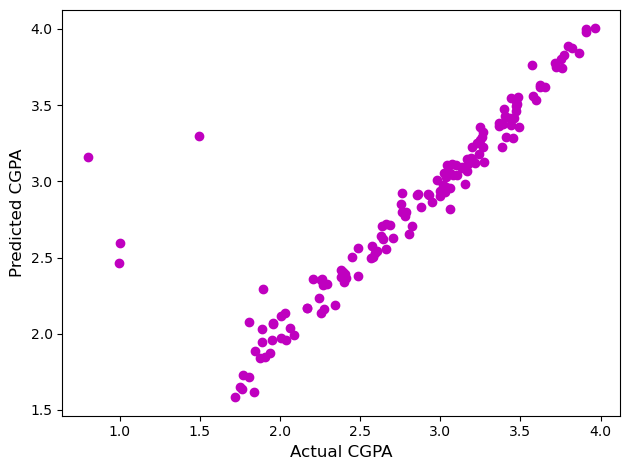

In [286]:
plt.scatter(y_test, y_pred, color = 'm')
plt.xlabel("Actual CGPA", fontsize = 12)
plt.ylabel('Predicted CGPA', fontsize = 12)
    
plt.tight_layout()

Observation:
            1. We are able to see almost all samples are following linear curve

## KNN Regressor

In [287]:
from sklearn.neighbors import KNeighborsRegressor

In [288]:
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [289]:
knn.score(x_train, y_train)

0.9619819329965528

In [290]:
knn.score(x_test, y_test)

0.736179765651569

Observation:
            1. Training score - 0.9619
            2. Testing Score - 0.7361

In [291]:
y_pred_knn = knn.predict(x_test)
y_pred_knn

array([3.9246, 1.9118, 3.8034, 1.8696, 3.671 , 3.3996, 3.4678, 2.6948,
       3.3974, 2.9726, 3.839 , 3.3392, 2.6388, 2.5304, 3.443 , 3.0484,
       2.4954, 3.1172, 1.8602, 2.1122, 3.9404, 3.108 , 2.4566, 3.2618,
       2.4292, 3.3778, 2.5118, 3.429 , 2.1974, 2.639 , 1.8588, 2.561 ,
       3.0496, 2.2956, 3.2742, 3.1914, 3.0788, 2.0456, 2.8718, 3.1148,
       2.9102, 3.2676, 2.2448, 3.5796, 3.7334, 3.1632, 2.7294, 1.9836,
       2.3998, 2.0764, 2.6008, 2.9046, 3.7406, 2.5794, 1.9298, 1.8714,
       3.3596, 3.1574, 3.0594, 3.1382, 2.1662, 3.5468, 2.572 , 3.7928,
       3.4124, 2.7538, 2.042 , 3.0006, 2.481 , 3.621 , 2.3852, 3.479 ,
       2.2204, 2.6196, 3.6248, 2.4658, 2.7292, 2.7786, 3.2944, 2.9472,
       3.5142, 3.3442, 3.7778, 3.9358, 3.185 , 3.8742, 3.1414, 3.2338,
       3.274 , 3.2056, 2.9126, 2.0042, 2.3332, 3.6262, 1.9018, 3.2292,
       2.3564, 3.1174, 3.6556, 2.2504, 2.4072, 3.3162, 2.9044, 3.3174,
       2.3456, 3.137 , 3.3342, 2.8858, 3.308 , 1.851 , 3.0638, 3.2232,
      

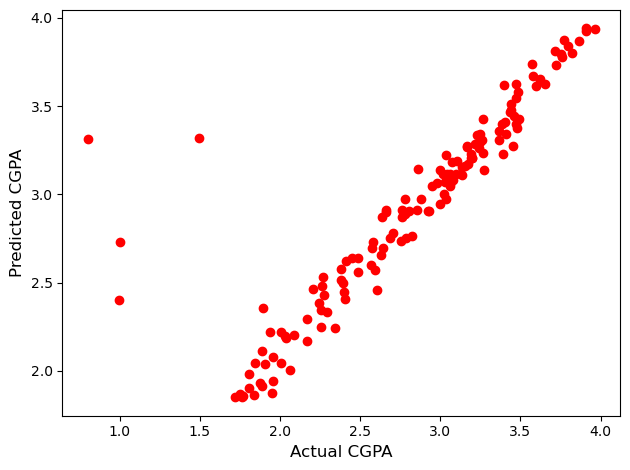

In [292]:
plt.scatter(y_test, y_pred_knn, color = 'r')
plt.xlabel("Actual CGPA", fontsize = 12)
plt.ylabel('Predicted CGPA', fontsize = 12)
    
plt.tight_layout()

In [ ]:
Observation:
            1. We are able to see almost all samples are following linear curve

## Regularization

## To check whether Linear Regression Model is overfitting or not - so use Regularization

In [293]:
from sklearn.linear_model import Lasso, Ridge, LassoCV, RidgeCV

## Ridge Regularization

In [294]:
ridgecv = RidgeCV(alphas = np.arange(0.001, 0.1, 0.01))

In [295]:
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]))

In [296]:
# learning rate - model has learned at this rate , it is telling to use 0.09 value

ridgecv.alpha_

0.09099999999999998

In [297]:
ridge_model = Ridge(alpha = ridgecv.alpha_)

In [298]:
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.09099999999999998)

In [299]:
ridge_model.score(x_train, y_train)

0.9787011256052666

In [300]:
ridge_model.score(x_test, y_test)

0.7673152798960732

Observation:
            1. Training score - 0.9787
            2. Testing Score - 0.7673

In [301]:
# Linear Regression Model

model_LR.score(x_test, y_test)

0.7673220310951789

Observation:
            1. Linear Regression Model was not overfitting - 
                 as Linear Regression Model, Lasso model and Ridge model gave same result 0.76
            2. Therefore no overfitting

In [302]:
y_pred_ridge_model = ridge_model.predict(x_test)
y_pred_ridge_model

array([3.98181546, 1.94304011, 3.8742162 , 1.6501837 , 3.55786061,
       3.22753718, 3.41529156, 2.57542991, 3.49320677, 2.77302424,
       3.8854847 , 3.35698966, 2.38108559, 2.32212655, 3.41836516,
       3.05756057, 2.40419902, 3.10752707, 1.61601233, 2.03077777,
       3.99636746, 3.08592193, 2.54566878, 3.17610004, 2.16244873,
       3.50654837, 2.36956311, 3.3532906 , 2.13588762, 2.50241366,
       1.72938015, 2.56004257, 2.86352587, 2.17120797, 3.14789964,
       3.0430661 , 3.03917609, 1.97351724, 2.70492773, 2.97391726,
       2.79847893, 3.06827912, 2.18702743, 3.55585893, 3.74947503,
       2.98063668, 2.50391043, 2.07906132, 2.46290723, 2.06532998,
       2.49926345, 2.65667776, 3.76205236, 2.42041477, 1.84282509,
       1.95692093, 3.3637606 , 3.09668485, 2.82048721, 3.12918441,
       2.16866943, 3.52790721, 2.53164476, 3.80329824, 3.42896539,
       2.79752172, 1.88416165, 3.05449026, 2.36202008, 3.47634441,
       2.23583289, 3.36957025, 2.11316211, 2.36622291, 3.45858

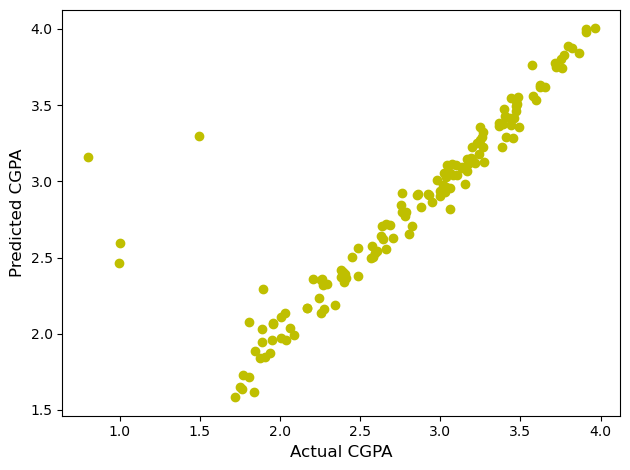

In [303]:
plt.scatter(y_test, y_pred_ridge_model, color = 'y')
plt.xlabel("Actual CGPA", fontsize = 12)
plt.ylabel('Predicted CGPA', fontsize = 12)
    
plt.tight_layout()

## Random Forest Regression

In [304]:
from sklearn.ensemble import RandomForestRegressor

In [305]:
RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)

RandomForestRegressor()

In [306]:
RFR.score(x_train, y_train)

0.9911673452747798

In [307]:
RFR.score(x_test, y_test)

0.7265506797100543

Observation:
            1. Training score - 0.9911
            2. Testing Score - 0.7265

In [308]:
y_pred_RFR = RFR.predict(x_test)
y_pred_RFR

array([3.84828, 2.11802, 3.79003, 2.00219, 3.72237, 3.19874, 3.38278,
       2.60591, 3.34168, 2.75555, 3.7707 , 3.23605, 2.64427, 2.4977 ,
       3.4291 , 3.22945, 2.46755, 3.18846, 1.99966, 2.2311 , 3.87678,
       3.16508, 2.41916, 3.27205, 2.1206 , 3.40374, 2.33657, 3.43606,
       2.14474, 2.55459, 2.23402, 2.50271, 2.94492, 2.32924, 3.071  ,
       3.10287, 3.13454, 2.18056, 2.54051, 2.97602, 2.7102 , 3.2751 ,
       2.22704, 3.51435, 3.78881, 3.09616, 2.56898, 2.12416, 2.68146,
       2.36002, 2.66767, 2.88234, 3.629  , 2.58213, 1.97057, 2.05625,
       3.37261, 3.10942, 2.95604, 3.26719, 2.36004, 3.5394 , 2.55385,
       3.77572, 3.30805, 2.68775, 2.156  , 3.01003, 2.10949, 3.53974,
       2.52767, 3.37236, 2.11981, 2.50918, 3.48467, 2.3    , 2.75542,
       2.69735, 3.18318, 3.04438, 3.44859, 3.37023, 3.75361, 3.86537,
       2.89139, 3.76038, 2.99561, 3.28107, 3.39059, 3.21061, 2.74101,
       2.14711, 2.52878, 3.62313, 2.08048, 3.13595, 2.19727, 2.95917,
       3.56877, 2.22

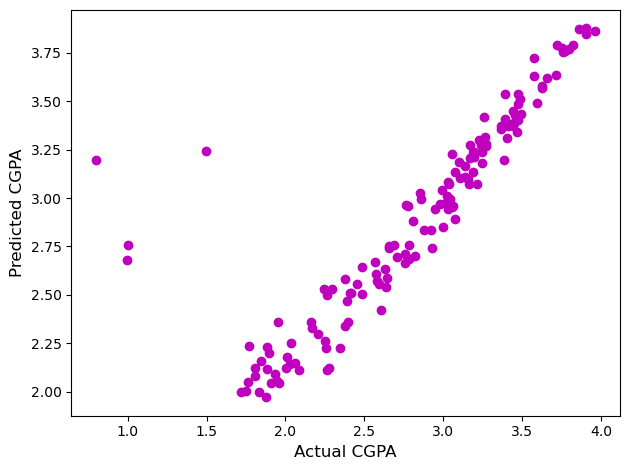

In [309]:
plt.scatter(y_test, y_pred_RFR, color = 'm')
plt.xlabel("Actual CGPA", fontsize = 12)
plt.ylabel('Predicted CGPA', fontsize = 12)
    
plt.tight_layout()

Observation:
            1. We are able to see almost all samples are following linear curve

## Hyperparameter Tuning - Ridge Regression

In [310]:
from sklearn.model_selection import GridSearchCV

parameters = {'alpha': [1.0, 0.05, 0.4, 2], 'fit_intercept': [True, False], 
              'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag', 'saga', 'lbfgs'],
             'positive': [False, True], 'random_state': [1, 4, 10, 20]}

In [311]:
ridge = GridSearchCV(Ridge(), parameters, cv = 5)

In [313]:
ridge.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.05, 0.4, 2],
                         'fit_intercept': [True, False],
                         'positive': [False, True],
                         'random_state': [1, 4, 10, 20],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag',
                                    'saga', 'lbfgs']})

In [314]:
ridge.best_params_

{'alpha': 2,
 'fit_intercept': True,
 'positive': False,
 'random_state': 4,
 'solver': 'saga'}

In [315]:
ridge_hyper_model = Ridge(alpha = 2, fit_intercept = True, positive = False, random_state = 4, solver = 'saga')

ridge_hyper_model.fit(x_train, y_train)

Ridge(alpha=2, random_state=4, solver='saga')

In [316]:
ridge_hyper_model.score(x_train, y_train)

0.97869945963247

In [317]:
ridge_hyper_model.score(x_test, y_test)

0.7671404751307307

Observation:
            1. Training score - 0.9786
            2. Testing Score - 0.7671

In [318]:
y_pred_ridge_hyper_model = ridge_hyper_model.predict(x_test)
y_pred_ridge_hyper_model

array([3.98188091, 1.94298876, 3.87344642, 1.65239027, 3.55821536,
       3.22838347, 3.41543605, 2.57569328, 3.49217631, 2.77254554,
       3.88447813, 3.35723334, 2.38019948, 2.32176827, 3.41720314,
       3.05703861, 2.40331193, 3.1054968 , 1.61860249, 2.03158273,
       3.99663873, 3.08600017, 2.54595526, 3.17582171, 2.16353923,
       3.50469975, 2.36850523, 3.35370582, 2.13642027, 2.50206098,
       1.73100737, 2.55906424, 2.86283324, 2.17140608, 3.1482502 ,
       3.04421431, 3.03804533, 1.97432661, 2.70497245, 2.97432689,
       2.79872134, 3.0694762 , 2.18629774, 3.55484256, 3.74951653,
       2.98170129, 2.50398288, 2.07823148, 2.46379921, 2.06616902,
       2.49977914, 2.6569782 , 3.76084222, 2.41939574, 1.84544823,
       1.95783006, 3.36392136, 3.0956204 , 2.82139643, 3.12845723,
       2.16776182, 3.52819033, 2.5321888 , 3.80297531, 3.42994007,
       2.7964126 , 1.88383552, 3.05576611, 2.36191584, 3.47553952,
       2.23732147, 3.37056033, 2.11405943, 2.36625466, 3.45842

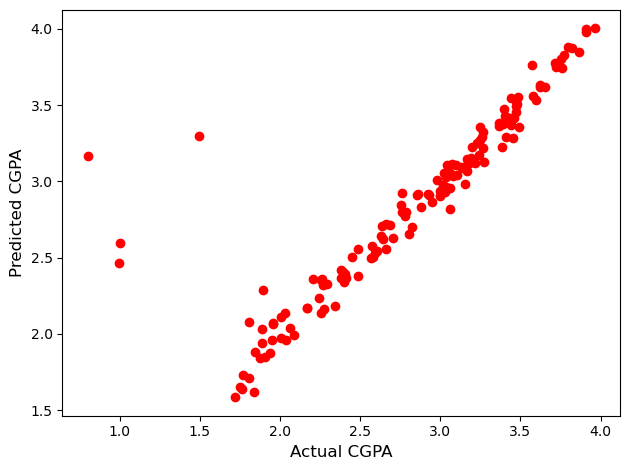

In [319]:
plt.scatter(y_test, y_pred_ridge_hyper_model, color = 'r')
plt.xlabel("Actual CGPA", fontsize = 12)
plt.ylabel('Predicted CGPA', fontsize = 12)
    
plt.tight_layout()

Final observation comparing all the algorithms:
            1. Linear regression - Training - 0.9787 and Testing - 0.7673
            2. KNN Regressor - Training - 0.9619 and Testing - 0.7361
            3. Ridge Model - Training - 0.9787 and Testing - 0.7673
            4. Random Forest Regression - Training - 0.9911 and Testing - 0.7265
            5. Hypertuned Ridge Model -  Training - 0.9786 and Testing - 0.7671

Finally Ridge model have chosen for predicting the CGPA of a student based on different grades in four years.

## Saving the model

In [324]:
# use Ridge Regularization Model to save the model 

import pickle
filename = "Student_Grade_Prediction_Model.pkl"
pickle.dump(ridge_model, open(filename, 'wb'))

## Predict the saved model

In [325]:
# lets load the saved model and get the prediction

loaded_model = pickle.load(open('Student_Grade_Prediction_Model.pkl', 'rb'))

In [326]:
result = loaded_model.score(x_test, y_test)
print(result)

0.7673152798960732


In [327]:
compare_Pred_Actual = pd.DataFrame([loaded_model.predict(x_test)[:], y_test[:]], index=['Predicted', 'Actual'])
compare_Pred_Actual

,0,1,2,3,4,5,6,7,8,9,...,133,134,135,136,137,138,139,140,141,142
Predicted,3.981815,1.94304,3.874216,1.650184,3.557861,3.227537,3.415292,2.57543,3.493207,2.773024,...,3.535535,3.224421,2.621034,3.325054,2.924994,1.989321,3.130931,2.337214,2.912694,2.930768
Actual,3.908000,1.88600,3.820000,1.749000,3.576000,3.386000,3.432000,2.57400,3.470000,2.782000,...,3.597000,3.195000,2.644000,3.267000,2.763000,2.084000,3.189000,2.396000,2.854000,3.029000


In [ ]:
Observation:
            1. Moderately actual and predicted values match
            2. This Student_Grade_Prediction_Model.pkl can be used to predict CGPA of a student based 
                on different grades in four years